In [1]:
import pandas as pd
import numpy as np
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
# Load the dataset
url = "C:\\Users\\DELL\\sentiment analysis\\synthetic_healthcare_reviews_with_text.csv"   #url = r"C:\Users\DELL\sentiment analysis\synthetic_healthcare_reviews_with_text.csv"      #url = "C:/Users/DELL/sentiment analysis/synthetic_healthcare_reviews_with_text.csv"
df = pd.read_csv(url)


In [3]:
df.head()

,Review_Text,Rating
0,The visit was average. Mixed feelings.,2
1,The service had satisfied. Highly recommended.,2
2,The visit was decent. Neither good nor bad.,4
3,The experience was unremarkable. Nothing excep...,1
4,The environment exceeded excellent. Exceeded m...,2


In [4]:
df.describe()

,Rating
count,10000.000000
mean,2.996900
std,1.420948
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,5.000000


In [15]:
print(df.dtypes)

print(df.shape)

Review_Text    object
Rating          int64
dtype: object
(10000, 2)


In [6]:
# Remove rows where 'Review_Text' is null
data_cleaned = df.dropna(subset=['Review_Text'])

# Display the cleaned DataFrame
print(data_cleaned)

# Save the cleaned data to a new CSV file
data_cleaned.to_csv('cleaned_data_sentiment_analysis.csv', index=False)

                                            Review_Text  Rating
0                The visit was average. Mixed feelings.       2
1        The service had satisfied. Highly recommended.       2
2           The visit was decent. Neither good nor bad.       4
3     The experience was unremarkable. Nothing excep...       1
4     The environment exceeded excellent. Exceeded m...       2
...                                                 ...     ...
9995        The visit had average. Nothing exceptional.       2
9996         The service felt best. Highly recommended.       4
9997       The provider felt rude. Would not recommend.       2
9998  The provider made terrible. Multiple mistakes ...       1
9999    The service met mediocre. Neither good nor bad.       5

[9000 rows x 2 columns]


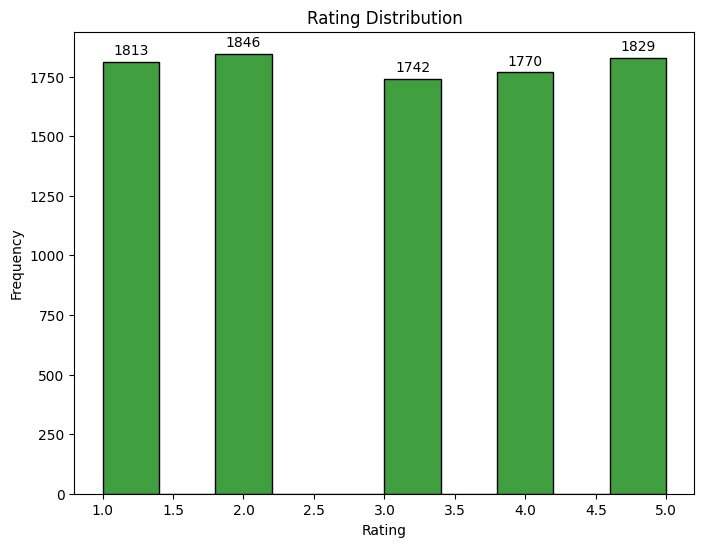

In [17]:
# For example, if there's a numerical column called 'Rating'

plt.figure(figsize=(8, 6))
ax = sns.histplot(data_cleaned['Rating'], bins=10,  color='green')
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')

# Calculate the total count
total_count = data_cleaned['Rating'].count()

for p in ax.patches:
        height = p.get_height()
        if height > 0:  # Only annotate bars that have a height greater than 0
            ax.annotate(f'{int(height)}', 
                        (p.get_x() + p.get_width() / 2., height), 
                        ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5),
                        textcoords='offset points')
plt.show()




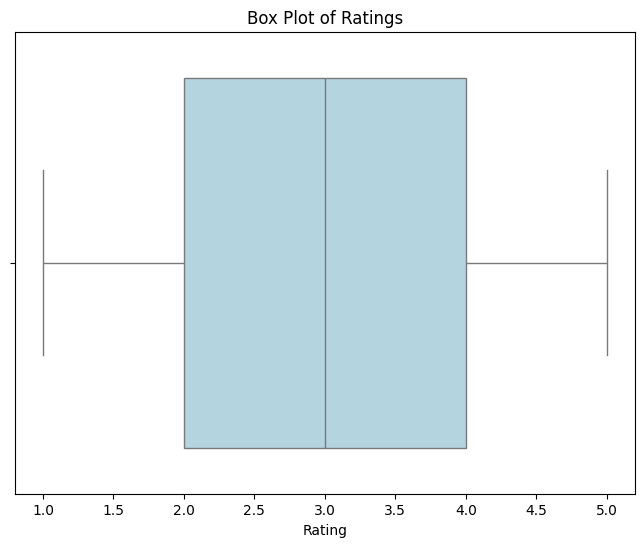

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you want to create a box plot for the 'Rating' column
if 'Rating' in data_cleaned.columns:
    plt.figure(figsize=(8, 6))
    
    # Create a box and whisker plot for the 'Rating' column
    sns.boxplot(data=data_cleaned, x='Rating', color='lightblue')

    # Add title and labels
    plt.title('Box Plot of Ratings')
    plt.xlabel('Rating')

    # Show the plot
    plt.show()
else:
    print("The 'Rating' column is not present in the dataset.")

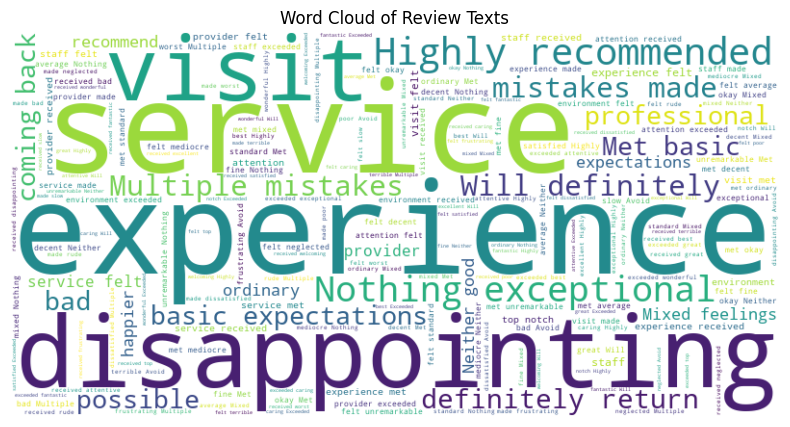

In [19]:
# Replace NaN or non-string entries with an empty string
df['Review_Text'] = df['Review_Text'].fillna('')

# Combine all review texts into one string
all_reviews = ' '.join(df['Review_Text'].astype(str))

# Create and display the word cloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Review Texts')
plt.show()


In [7]:
from sklearn.feature_extraction.text import CountVectorizer

# Use CountVectorizer to extract n-grams from the misclassified reviews
vectorizer = CountVectorizer(ngram_range=(2, 3), stop_words='english')
X = vectorizer.fit_transform(data_cleaned['Review_Text'])

# Get the n-grams and their frequencies
ngrams = vectorizer.get_feature_names_out()
frequencies = X.toarray().sum(axis=0)

# Combine the n-grams and their frequencies into a DataFrame
ngram_df = pd.DataFrame({'Ngram': ngrams, 'Frequency': frequencies})

# Sort by frequency to see the most common n-grams
ngram_df = ngram_df.sort_values(by='Frequency', ascending=False)

# Print the top n-grams that could indicate idioms or common problematic phrases
print(ngram_df.head(20))

# Save the cleaned data to a new CSV file
ngram_df.to_csv('cs_frequency_analysis_analysing_cleaned_data_sentiment_analysis_fine.csv', index=False)

                       Ngram  Frequency
832       highly recommended        660
909        multiple mistakes        623
158        definitely return        613
129       basic expectations        599
850   met basic expectations        599
849                met basic        599
120           avoid possible        598
1904              won coming        597
833            just ordinary        594
900           mixed feelings        581
822                 good bad        575
148           couldn happier        573
306    exceeded expectations        560
1353            service felt        492
439          experience felt        463
1770              visit felt        364
1808               visit met        277
494           experience met        256
1408             service met        244
1068       provider received        226


In [8]:
import pandas as pd
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk

# Ensure NLTK resources are downloaded
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize VADER SentimentIntensityAnalyzer and preprocessing tools
analyzer = SentimentIntensityAnalyzer()
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Load your dataset
df = pd.read_csv("C:\\Users\\DELL\\sentiment analysis\\cleaned_data_sentiment_analysis.csv")

# Define the text cleaning function
def clean_text(text):
    # Remove non-word characters and multiple spaces
    text = re.sub(r'\W', ' ', str(text))
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)
    text = re.sub(r'\^[a-zA-Z]\s+', ' ', text)
    text = re.sub(r'\s+', ' ', text, flags=re.I)
    text = re.sub(r'^b\s+', '', text)
    
    # Convert to lowercase
    text = text.lower()
    
    # Tokenize and remove stopwords
    words = text.split()
    words = [word for word in words if word not in stop_words]
    
    # Lemmatize the words
    words = [lemmatizer.lemmatize(word) for word in words]
    
    # Join the lemmatized words back into a single string
    return ' '.join(words)

# Apply the cleaning function to the 'Review_Text' column 
if 'Review_Text' in df.columns:
    df['cleaned_review'] = df['Review_Text'].apply(clean_text)
    print(df[['Review_Text', 'cleaned_review']].head())
else:
    print("The column 'Review_Text' does not exist in the dataset.")
    
# Display the dataframe with the new 'cleaned_review' column
print(df[['cleaned_review', 'Rating']].head())

# Save the cleaned data to a new CSV file
df.to_csv('cs_analysing_cleaned_data_sentiment_analysis_fine.csv', index=False)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                                         Review_Text  \
0             The visit was average. Mixed feelings.   
1     The service had satisfied. Highly recommended.   
2        The visit was decent. Neither good nor bad.   
3  The experience was unremarkable. Nothing excep...   
4  The environment exceeded excellent. Exceeded m...   

                                      cleaned_review  
0                        visit average mixed feeling  
1               service satisfied highly recommended  
2                      visit decent neither good bad  
3        experience unremarkable nothing exceptional  
4  environment exceeded excellent exceeded expect...  
                                      cleaned_review  Rating
0                        visit average mixed feeling       2
1               service satisfied highly recommended       2
2                      visit decent neither good bad       4
3        experience unremarkable nothing exceptional       1
4  environment exceeded exce

In [9]:
# Install VADER if you don't have it
#!pip install vaderSentiment

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()


df = pd.read_csv("C:\\Users\\DELL\\sentiment analysis\\cs_analysing_cleaned_data_sentiment_analysis_fine.csv")


# Example: Analyze the sentiment of each review
df['Sentiment_Scores'] = df['Review_Text'].apply(lambda review: analyzer.polarity_scores(review))

# Extract compound sentiment score (which ranges from -1 to 1)
df['Compound_Score'] = df['Sentiment_Scores'].apply(lambda x: x['compound'])



# Display the sentiment counts
print(df['Compound_Score'].value_counts())

df.to_csv('cs_sentiment_analysis_compound_score.csv', index=False)


Compound_Score
 0.0000    2240
-0.5824     454
 0.2023     274
 0.2263     264
 0.5719     204
           ... 
-0.7430      46
-0.7902      46
-0.3612      45
-0.6369      43
 0.6705      43
Name: count, Length: 79, dtype: int64


In [10]:
import pandas as pd

# Load your dataset
df = pd.read_csv("C:\\Users\\DELL\\sentiment analysis\\cs_sentiment_analysis_compound_score.csv")

# Function to manually adjust the rating based on Compound_Score and Rating
def manually_adjust_rating(row):
    if row['Compound_Score'] >= 0.5 and row['Rating'] <= 2:  # Strong positive sentiment
        return 5  # Set the rating to 5
    elif 0.05 <= row['Compound_Score'] < 0.5 and row['Rating'] <= 2:  # Mild positive sentiment
        return 4  # Set the rating to 4
    elif -0.05 <= row['Compound_Score'] <0.05 :  # Neutral sentiment
        return 3  # Set the rating to 3
    elif -0.5 <= row['Compound_Score'] < -0.05 and row['Rating'] >= 4:  # Mild negative sentiment
        return 2  # Set the rating to 2
    elif row['Compound_Score'] < -0.5 and row['Rating'] >= 4:  # Strong negative sentiment
        return 1  # Set the rating to 1
    else:
        return row['Rating']  # If no conditions match, return the original rating

# Apply the manual rating adjustment based on the Compound_Score
df['Adjusted_Rating'] = df.apply(manually_adjust_rating, axis=1)

# Save the adjusted data to a new CSV file 
df.to_csv('cs_sentiment_analysis_compound_score_adjusted_rating.csv', index=False)

# Filter rows where the Rating or Adjusted Rating is neutral (3)
df_neutral = df[(df['Rating'] == 3) | (df['Adjusted_Rating'] == 3)]

# Save the neutral rows to a new CSV file
df_neutral.to_csv('neutral_under.csv', index=False)

# Corrected Filter rows where Compound_Score is between -0.05 and 0.05 (inclusive) and specific Rating conditions
filtered_df = df_neutral[~((df_neutral['Compound_Score'] >= -0.05) & (df_neutral['Compound_Score'] <= 0.05)) ]

# Save the filtered neutral rows to a new CSV file
filtered_df.to_csv('filtered_neutral_under.csv', index=False)

# Now, remove the filtered rows from the original dataset
neutral_filtered_dataset = df[~df.index.isin(filtered_df.index)]

# Save the final dataset without the filtered rows to a new CSV file
neutral_filtered_dataset.to_csv('everything_cleared.csv', index=False)


In [11]:
df = pd.read_csv("C:\\Users\\DELL\\sentiment analysis\\everything_cleared.csv")



def map_rating_to_sentiment(Adjusted_Rating):
    if Adjusted_Rating >= 4:
        return 'Positive'
    elif Adjusted_Rating == 3:
        return 'Neutral'
    else:
        return 'Negative'

# Apply the function to the 'Rating' column to create a new 'Sentiment' column
df['Sentiment'] = df['Adjusted_Rating'].apply(map_rating_to_sentiment)

# Optionally, you can drop the original 'Rating' column if it's no longer needed
# data.drop('Rating', axis=1, inplace=True)

# Display the dataframe with the new 'Sentiment' column
df_sentiment_compound_score =df[['cleaned_review','Rating', 'Sentiment', 'Compound_Score', 'Adjusted_Rating']]


#print(df[['cleaned_review','Rating', 'Compound_Score', 'Adjusted_Rating', 'Sentiment']])

# Optionally, save the cleaned data to a new CSV file
df.to_csv('cs_sentiment_analysis_compound_score_adjusted_rating_sentiment.csv', index=False)

In [12]:
df = pd.read_csv("C:\\Users\DELL\\sentiment analysis\\cs_sentiment_analysis_compound_score_adjusted_rating_sentiment.csv")



# Filter rows where Rating and Adjusted_Rating are not equal
unequal_ratings = df[df['Rating'] != df['Adjusted_Rating']]

print(unequal_ratings.shape[0])

# Display the rows where the ratings are different
print(unequal_ratings[['Review_Text', 'Rating', 'Adjusted_Rating', 'Sentiment', 'Compound_Score']])

# Optionally, save the filtered data to a new CSV file
unequal_ratings.to_csv('unequal_ratings.csv', index=False)

# Filtering the dataset for specific conditions
filtered_ratings = unequal_ratings[~(((unequal_ratings['Rating'] == 2) & (unequal_ratings['Adjusted_Rating'] == 4)) |
                                     
                                     ((unequal_ratings['Rating'] == 2) & (unequal_ratings['Adjusted_Rating'] == 5)) |
                                     ((unequal_ratings['Rating'] == 1) & (unequal_ratings['Adjusted_Rating'] == 4)) |
                                     ((unequal_ratings['Rating'] == 5) & (unequal_ratings['Adjusted_Rating'] == 2)) |
                                     ((unequal_ratings['Rating'] == 4) & (unequal_ratings['Adjusted_Rating'] == 1)) |
                                   
                      ((unequal_ratings['Rating'] == 1) & (unequal_ratings['Adjusted_Rating'] == 5)) |
                     
                      ((unequal_ratings['Rating'] == 5) & (unequal_ratings['Adjusted_Rating'] == 1)) |
                      
                      
                      ((unequal_ratings['Rating'] == 5) & (unequal_ratings['Adjusted_Rating'] == 4)) |
                      
                      ((unequal_ratings['Rating'] == 4) & (unequal_ratings['Adjusted_Rating'] == 5)) |
                      
                      
                      ((unequal_ratings['Rating'] == 2) & (unequal_ratings['Adjusted_Rating'] == 1)) |
                      
                      ((unequal_ratings['Rating'] == 1) & (unequal_ratings['Adjusted_Rating'] == 2)) |
                      
                       
                      
                      ((unequal_ratings['Rating'] == 4) & (unequal_ratings['Adjusted_Rating'] == 2)))]


# Display the filtered data
print(filtered_ratings[['cleaned_review', 'Rating', 'Adjusted_Rating', 'Sentiment', 'Compound_Score']])

# Optionally, save the filtered data to a new CSV file
filtered_ratings.to_csv('filtered_ratings_remove.csv', index=False)


final_dataset = df_sentiment_compound_score[~df_sentiment_compound_score.isin(filtered_ratings).all(axis=1)]

# Optionally, save the filtered data to a new CSV file
final_dataset.to_csv('cs_final_dataset_try.csv', index=False)




4566
                                            Review_Text  Rating  \
0                The visit was average. Mixed feelings.       2   
1        The service had satisfied. Highly recommended.       2   
2           The visit was decent. Neither good nor bad.       4   
3     The experience was unremarkable. Nothing excep...       1   
4     The environment exceeded excellent. Exceeded m...       2   
...                                                 ...     ...   
7681       The experience felt mediocre. Just ordinary.       4   
7683  The experience had ordinary. Neither good nor ...       5   
7685  The experience received poor. Won't be coming ...       4   
7687        The visit had average. Nothing exceptional.       2   
7691    The service met mediocre. Neither good nor bad.       5   

      Adjusted_Rating Sentiment  Compound_Score  
0                   3   Neutral          0.0000  
1                   5  Positive          0.5984  
2                   1  Negative         

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\DELL\AppData\Local\Temp\ipykernel_15184\2234282361.py:1: SyntaxWarning: invalid escape sequence '\D'
  df = pd.read_csv("C:\\Users\DELL\\sentiment analysis\\cs_sentiment_analysis_compound_score_adjusted_rating_sentiment.csv")


In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE


df = pd.read_csv("C:\\Users\\DELL\\sentiment analysis\\cs_final_dataset_try.csv")


# Assuming 'final_dataset' is your DataFrame containing 'Review_Text' and 'Sentiment'
# Convert text data into features using TF-IDF
tfidf = TfidfVectorizer(ngram_range=(1, 3), max_features=15000, min_df=2, max_df=0.75, stop_words='english')
X_tfidf = tfidf.fit_transform(df['cleaned_review'])

# Encode the 'Sentiment' column to numeric values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['Sentiment'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Initialize SMOTE to oversample the minority class
from imblearn.combine import SMOTETomek

smote_tomek = SMOTETomek(random_state=42)
X_train_smote, y_train_smote = smote_tomek.fit_resample(X_train, y_train)


# Initialize the RandomForestClassifier
model = RandomForestClassifier(
    n_estimators=500,      # Number of trees
    max_depth=15,          # Maximum depth of trees
    min_samples_split=10,  # Minimum samples to split a node
    random_state=42,
    class_weight='balanced'  # Handle class imbalance
)

# Train the model using the oversampled dataset
model.fit(X_train_smote, y_train_smote)

# Make predictions on the test set (getting probabilities)
y_probs = model.predict_proba(X_test)

# Calculate accuracy of the predictions
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Calculate ROC-AUC for multiclass classification
roc_auc = roc_auc_score(y_test, y_probs, multi_class='ovr', average='macro')  # 'ovr' stands for one-vs-rest
print(f'ROC-AUC Score: {roc_auc * 100:.2f}%')


Accuracy: 98.96%
ROC-AUC Score: 99.95%


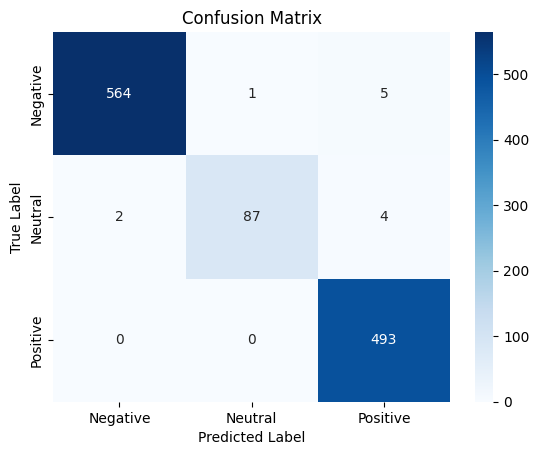

In [29]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=[0, 1, 2])  # Adjust labels based on your classes

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [30]:
import numpy as np
import pandas as pd

# Assuming you have already fit the TF-IDF vectorizer on your original data.
# tfidf is the fitted TfidfVectorizer
# X_test is your test data in TF-IDF format

# Get the feature names (words) that correspond to the columns in the TF-IDF matrix
feature_names = np.array(tfidf.get_feature_names_out())

# Function to approximate original text based on the top TF-IDF words
def get_top_tfidf_words(row, top_n=5):
    # Sort by TF-IDF scores in descending order
    top_indices = row.toarray().argsort()[:, -top_n:][0]
    top_words = feature_names[top_indices]
    return ' '.join(top_words)

# Example to create a DataFrame with approximated reviews from X_test
approximate_reviews = [get_top_tfidf_words(X_test[i], top_n=5) for i in range(X_test.shape[0])]

# Assuming y_test and y_pred are your actual and predicted labels
df_approx = pd.DataFrame({
    'Approximated_Review': approximate_reviews,
    'Actual_Sentiment': y_test,
    'Predicted_Sentiment': y_pred
})

# Filter for misclassified examples
misclassified_reviews = df_approx[df_approx['Actual_Sentiment'] != df_approx['Predicted_Sentiment']]

# Print the misclassified approximated reviews
print(misclassified_reviews)

# Optionally, save the filtered data to a new CSV file
misclassified_reviews.to_csv('cs_misclassified_reviews_try.csv', index=False)



                                    Approximated_Review  Actual_Sentiment  \
163   happier exceptional exceptional happier servic...                 0   
179   attention attentive attentive happier attentio...                 0   
187   happier attention notch notch happier attentio...                 0   
233   service exceeded attentive happier exceeded at...                 0   
239   experience professional notch experience notch...                 1   
666   coming slow visit slow slow coming visit slow ...                 1   
791   coming slow visit slow slow coming visit slow ...                 1   
1003  professional attention attentive attentive pro...                 1   
1005  experience exceeded notch happier exceeded not...                 0   
1114  environment received received attentive attent...                 1   
1142  provider exceeded attentive happier exceeded a...                 0   
1153  notch received notch notch exceeded notch exce...                 1   

Accuracy: 98.96%
ROC-AUC Score: 99.95%
Test Accuracy: 98.00%
              precision    recall  f1-score   support

    Negative       0.98      0.98      0.98        62
     Neutral       1.00      1.00      1.00         9
    Positive       0.97      0.97      0.97        29

    accuracy                           0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100

                                         Review_Text Sentiment  \
0                      provider rude would recommend  Negative   
1                  staff top notch definitely return  Positive   
2            experience standard nothing exceptional   Neutral   
3    experience exceeded wonderful definitely return  Positive   
4   environment exceeded caring exceeded expectation  Positive   
..                                               ...       ...   
95                 provider made poor avoid possible  Negative   
96          provider received 

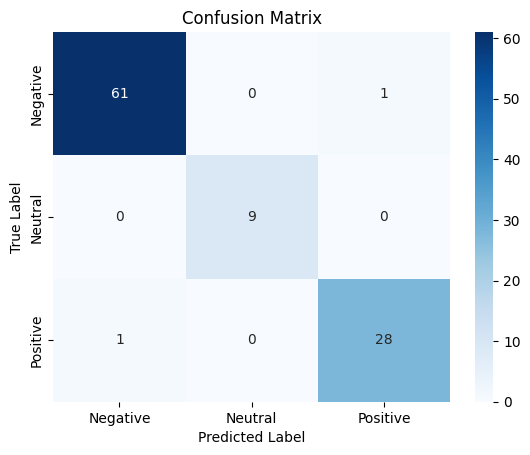

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE


df = pd.read_csv("C:\\Users\\DELL\\sentiment analysis\\cs_final_dataset_try.csv")


# Assuming 'final_dataset' is your DataFrame containing 'Review_Text' and 'Sentiment'
# Convert text data into features using TF-IDF
tfidf = TfidfVectorizer(ngram_range=(1, 3), max_features=15000, min_df=2, max_df=0.75, stop_words='english')
X_tfidf = tfidf.fit_transform(df['cleaned_review'])

# Encode the 'Sentiment' column to numeric values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['Sentiment'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Initialize SMOTE to oversample the minority class
from imblearn.combine import SMOTETomek

smote_tomek = SMOTETomek(random_state=42)
X_train_smote, y_train_smote = smote_tomek.fit_resample(X_train, y_train)


# Initialize the RandomForestClassifier
model = RandomForestClassifier(
    n_estimators=500,      # Number of trees
    max_depth=15,          # Maximum depth of trees
    min_samples_split=10,  # Minimum samples to split a node
    random_state=42,
    class_weight='balanced'  # Handle class imbalance
)

# Train the model using the oversampled dataset
model.fit(X_train_smote, y_train_smote)

# Make predictions on the test set (getting probabilities)
y_probs = model.predict_proba(X_test)

# Calculate accuracy of the predictions
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Calculate ROC-AUC for multiclass classification
roc_auc = roc_auc_score(y_test, y_probs, multi_class='ovr', average='macro')  # 'ovr' stands for one-vs-rest
print(f'ROC-AUC Score: {roc_auc * 100:.2f}%')


# ----------------------------------------------------------
# Test the model on a new dataset
# ----------------------------------------------------------

import pandas as pd
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.sparse import hstack

# Assuming 'tfidf', 'scaler', 'label_encoder', and 'model' are already defined and trained

# Create a DataFrame for the test data
# Sample review text and sentiment data for model testing
data = {
    'Review_Text': ['provider rude would recommend', 'staff top notch definitely return', 'experience standard nothing exceptional', 'experience exceeded wonderful definitely return', 'environment exceeded caring exceeded expectation', 'visit received poor disappointing', 'service made poor multiple mistake made', 'service mediocre mixed feeling', 'provider felt welcoming happier', 'staff received worst disappointing', 'experience felt dissatisfied disappointing', 'service fine mixed feeling', 'environment exceeded wonderful exceeded expectation', 'environment received welcoming highly recommended', 'provider felt terrible multiple mistake made', 'staff worst disappointing', 'experience felt terrible multiple mistake made', 'provider made neglected coming back', 'service met decent mixed feeling', 'staff best highly recommended', 'staff received slow avoid possible', 'service made rude multiple mistake made', 'staff exceeded welcoming professional', 'staff made worst disappointing', 'staff received bad would recommend', 'staff received neglected avoid possible', 'staff dissatisfied multiple mistake made', 'visit okay neither good bad', 'visit received frustrating avoid possible', 'service felt standard met basic expectation', 'attention best happier', 'provider exceeded fantastic exceeded expectation', 'provider disappointing disappointing', 'experience felt satisfied happier', 'attention great professional', 'experience felt poor disappointing', 'staff felt slow would recommend', 'experience received disappointing coming back', 'service met average neither good bad', 'staff felt wonderful professional', 'provider made dissatisfied avoid possible', 'staff felt disappointing coming back', 'staff received fantastic definitely return', 'service mediocre mixed feeling', 'experience received disappointing disappointing', 'experience felt mediocre nothing exceptional', 'attention received excellent happier', 'attention received fantastic definitely return', 'experience exceeded top notch happier', 'provider disappointing coming back', 'experience made disappointing disappointing', 'experience made frustrating would recommend', 'service okay met basic expectation', 'visit received neglected disappointing', 'experience bad would recommend', 'provider made dissatisfied avoid possible', 'service met mediocre neither good bad', 'provider frustrating avoid possible', 'provider felt best exceeded expectation', 'provider exceeded great exceeded expectation', 'experience felt best professional', 'experience met mixed neither good bad', 'staff felt poor disappointing', 'staff neglected disappointing', 'staff made rude disappointing', 'service terrible coming back', 'experience mixed neither good bad', 'provider received bad multiple mistake made', 'provider received welcoming happier', 'service frustrating would recommend', 'experience felt excellent exceeded expectation', 'service felt poor would recommend', 'service received disappointing would recommend', 'service met decent neither good bad', 'service excellent definitely return', 'staff felt disappointing avoid possible', 'experience fantastic happier', 'attention received satisfied highly recommended', 'experience felt exceptional happier', 'attention received exceptional highly recommended', 'attention received top notch definitely return', 'visit okay ordinary', 'visit received slow would recommend', 'experience felt decent ordinary', 'experience felt ordinary mixed feeling', 'staff received satisfied highly recommended', 'service made poor avoid possible', 'visit felt dissatisfied avoid possible', 'service made poor disappointing', 'service made slow multiple mistake made', 'attention felt exceptional happier', 'service received dissatisfied multiple mistake made', 'provider dissatisfied multiple mistake made', 'provider made rude multiple mistake made', 'provider made frustrating disappointing', 'provider made poor avoid possible', 'provider received terrible disappointing', 'experience received dissatisfied avoid possible', 'experience fine neither good bad', 'provider felt terrible disappointing'],
    'Sentiment': ['Negative', 'Positive', 'Neutral', 'Positive', 'Positive', 'Negative', 'Negative', 'Neutral', 'Positive', 'Negative', 'Negative', 'Positive', 'Positive', 'Positive', 'Negative', 'Negative', 'Negative', 'Negative', 'Neutral', 'Positive', 'Negative', 'Negative', 'Positive', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Neutral', 'Positive', 'Positive', 'Negative', 'Neutral', 'Positive', 'Negative', 'Negative', 'Negative', 'Negative', 'Positive', 'Negative', 'Negative', 'Positive', 'Neutral', 'Negative', 'Neutral', 'Positive', 'Positive', 'Negative', 'Negative', 'Negative', 'Negative', 'Positive', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Positive', 'Positive', 'Positive', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Positive', 'Negative', 'Positive', 'Negative', 'Negative', 'Negative', 'Positive', 'Negative', 'Positive', 'Positive', 'Negative', 'Positive', 'Positive', 'Positive', 'Negative', 'Neutral', 'Neutral', 'Positive', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative']
}

df_test = pd.DataFrame(data)

# Step 10: Use the fitted TF-IDF vectorizer from the training set to transform the test data
X_test_tfidf = tfidf.transform(df_test['Review_Text'])

# Step 11: Calculate Compound Score for the new test data and scale it
#df_test['Compound_Score'] = df_test['Review_Text'].apply(lambda review: analyzer.polarity_scores(review)['compound'])
#compound_score_scaled_test = scaler.transform(df_test[['Compound_Score']])

# Step 12: Combine the TF-IDF test data with the scaled Compound Score
#X_test_combined = hstack([X_test_tfidf, compound_score_scaled_test])

# Step 13: Encode the sentiment labels in the test set
df_test['Sentiment_Encoded'] = label_encoder.transform(df_test['Sentiment'])

# Step 14: Predict the sentiment using the trained RandomForest model
y_pred_test = model.predict(X_test_tfidf)

# Step 15: Evaluate the model on the test data
test_accuracy = accuracy_score(df_test['Sentiment_Encoded'], y_pred_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Print the classification report for the test data
print(classification_report(df_test['Sentiment_Encoded'], y_pred_test, target_names=label_encoder.classes_))

# Step 16: Save the predictions along with the test reviews
df_test['Predicted_Sentiment'] = label_encoder.inverse_transform(y_pred_test)
df_test.to_csv('test_results_with_predictions.csv', index=False)

# Print the predictions
print(df_test[['Review_Text', 'Sentiment', 'Predicted_Sentiment']])

# Step 17: Generate and Plot confusion matrix
cm = confusion_matrix(df_test['Sentiment_Encoded'], y_pred_test)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()



Fitting 2 folds for each of 81 candidates, totalling 162 fits
Best Parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Accuracy after tuning: 99.39%
ROC-AUC Score after tuning: 99.98%
Test Accuracy: 100.00%
              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00        62
     Neutral       1.00      1.00      1.00         9
    Positive       1.00      1.00      1.00        29

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100

                                         Review_Text Sentiment  \
0                      provider rude would recommend  Negative   
1                  staff top notch definitely return  Positive   
2            experience standard nothing exceptional   Neutral   
3    experience exceeded wonderful definitely return  Positive   
4   environm

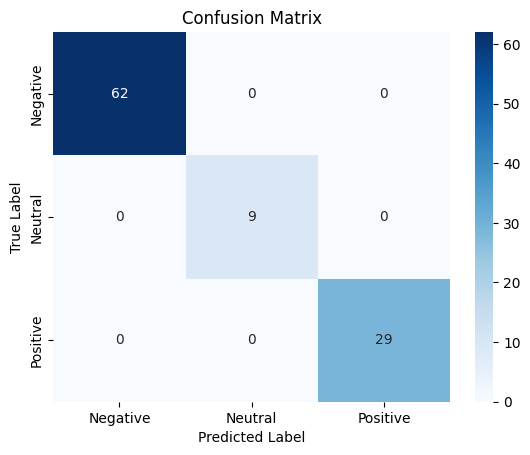

In [32]:
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from scipy.sparse import hstack

# Load dataset
df = pd.read_csv("C:\\Users\\DELL\\sentiment analysis\\cs_final_dataset_try.csv")

# Step 1: Use TF-IDF for text feature extraction
tfidf = TfidfVectorizer(ngram_range=(1, 3), max_features=15000, min_df=2, max_df=0.75, stop_words='english')
X_tfidf = tfidf.fit_transform(df['cleaned_review'])


# Step 5: Encode the 'Sentiment' column to numeric values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['Sentiment'])

# Step 6: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42, stratify=y)

# Step 7: Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200,300],
    'max_depth': [10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2,3],
    'max_features': ['sqrt']
}

# Initialize the RandomForestClassifier
rf = RandomForestClassifier(random_state=42, class_weight='balanced')

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=2, verbose=2, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters from the grid search
print(f"Best Parameters: {grid_search.best_params_}")

# Use the best model from grid search
best_rf_model = grid_search.best_estimator_

# Step 8: Make predictions on the test set
y_probs = best_rf_model.predict_proba(X_test)
y_pred = best_rf_model.predict(X_test)

# Step 9: Evaluate the model on the test set
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy after tuning: {accuracy * 100:.2f}%')

roc_auc = roc_auc_score(y_test, y_probs, multi_class='ovr', average='macro')
print(f'ROC-AUC Score after tuning: {roc_auc * 100:.2f}%')

# ----------------------------------------------------------
# Test the model on a new dataset
# ----------------------------------------------------------

# List of Review_Text and corresponding Sentiment labels (Test data)
data = {
    'Review_Text': ['provider rude would recommend', 'staff top notch definitely return', 'experience standard nothing exceptional', 'experience exceeded wonderful definitely return', 'environment exceeded caring exceeded expectation', 'visit received poor disappointing', 'service made poor multiple mistake made', 'service mediocre mixed feeling', 'provider felt welcoming happier', 'staff received worst disappointing', 'experience felt dissatisfied disappointing', 'service fine mixed feeling', 'environment exceeded wonderful exceeded expectation', 'environment received welcoming highly recommended', 'provider felt terrible multiple mistake made', 'staff worst disappointing', 'experience felt terrible multiple mistake made', 'provider made neglected coming back', 'service met decent mixed feeling', 'staff best highly recommended', 'staff received slow avoid possible', 'service made rude multiple mistake made', 'staff exceeded welcoming professional', 'staff made worst disappointing', 'staff received bad would recommend', 'staff received neglected avoid possible', 'staff dissatisfied multiple mistake made', 'visit okay neither good bad', 'visit received frustrating avoid possible', 'service felt standard met basic expectation', 'attention best happier', 'provider exceeded fantastic exceeded expectation', 'provider disappointing disappointing', 'experience felt satisfied happier', 'attention great professional', 'experience felt poor disappointing', 'staff felt slow would recommend', 'experience received disappointing coming back', 'service met average neither good bad', 'staff felt wonderful professional', 'provider made dissatisfied avoid possible', 'staff felt disappointing coming back', 'staff received fantastic definitely return', 'service mediocre mixed feeling', 'experience received disappointing disappointing', 'experience felt mediocre nothing exceptional', 'attention received excellent happier', 'attention received fantastic definitely return', 'experience exceeded top notch happier', 'provider disappointing coming back', 'experience made disappointing disappointing', 'experience made frustrating would recommend', 'service okay met basic expectation', 'visit received neglected disappointing', 'experience bad would recommend', 'provider made dissatisfied avoid possible', 'service met mediocre neither good bad', 'provider frustrating avoid possible', 'provider felt best exceeded expectation', 'provider exceeded great exceeded expectation', 'experience felt best professional', 'experience met mixed neither good bad', 'staff felt poor disappointing', 'staff neglected disappointing', 'staff made rude disappointing', 'service terrible coming back', 'experience mixed neither good bad', 'provider received bad multiple mistake made', 'provider received welcoming happier', 'service frustrating would recommend', 'experience felt excellent exceeded expectation', 'service felt poor would recommend', 'service received disappointing would recommend', 'service met decent neither good bad', 'service excellent definitely return', 'staff felt disappointing avoid possible', 'experience fantastic happier', 'attention received satisfied highly recommended', 'experience felt exceptional happier', 'attention received exceptional highly recommended', 'attention received top notch definitely return', 'visit okay ordinary', 'visit received slow would recommend', 'experience felt decent ordinary', 'experience felt ordinary mixed feeling', 'staff received satisfied highly recommended', 'service made poor avoid possible', 'visit felt dissatisfied avoid possible', 'service made poor disappointing', 'service made slow multiple mistake made', 'attention felt exceptional happier', 'service received dissatisfied multiple mistake made', 'provider dissatisfied multiple mistake made', 'provider made rude multiple mistake made', 'provider made frustrating disappointing', 'provider made poor avoid possible', 'provider received terrible disappointing', 'experience received dissatisfied avoid possible', 'experience fine neither good bad', 'provider felt terrible disappointing'],
    'Sentiment': ['Negative', 'Positive', 'Neutral', 'Positive', 'Positive', 'Negative', 'Negative', 'Neutral', 'Positive', 'Negative', 'Negative', 'Positive', 'Positive', 'Positive', 'Negative', 'Negative', 'Negative', 'Negative', 'Neutral', 'Positive', 'Negative', 'Negative', 'Positive', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Neutral', 'Positive', 'Positive', 'Negative', 'Neutral', 'Positive', 'Negative', 'Negative', 'Negative', 'Negative', 'Positive', 'Negative', 'Negative', 'Positive', 'Neutral', 'Negative', 'Neutral', 'Positive', 'Positive', 'Negative', 'Negative', 'Negative', 'Negative', 'Positive', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Positive', 'Positive', 'Positive', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Positive', 'Negative', 'Positive', 'Negative', 'Negative', 'Negative', 'Positive', 'Negative', 'Positive', 'Positive', 'Negative', 'Positive', 'Positive', 'Positive', 'Negative', 'Neutral', 'Neutral', 'Positive', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative']
}

# Create a DataFrame for the test data
df_test = pd.DataFrame(data)

# Step 10: Use the fitted TF-IDF vectorizer from the training set to transform the test data
X_test_tfidf = tfidf.transform(df_test['Review_Text'])  # Ensure this matches the vocabulary used in training

# Step 11: Calculate Compound Score for the new test data and scale it
#df_test['Compound_Score'] = df_test['Review_Text'].apply(lambda review: analyzer.polarity_scores(review)['compound'])
#compound_score_scaled_test = scaler.transform(df_test[['Compound_Score']])

# Step 12: Combine the TF-IDF test data with the scaled Compound Score
#X_test_combined = hstack([X_test_tfidf, compound_score_scaled_test])

# Step 13: Encode the sentiment labels in the test set
df_test['Sentiment_Encoded'] = label_encoder.transform(df_test['Sentiment'])

# Step 14: Predict the sentiment using the best RandomForest model
y_pred_test = best_rf_model.predict(X_test_tfidf)

# Step 15: Evaluate the model on the test data
test_accuracy = accuracy_score(df_test['Sentiment_Encoded'], y_pred_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Print the classification report for the test data
print(classification_report(df_test['Sentiment_Encoded'], y_pred_test, target_names=label_encoder.classes_))

# Step 16: Save the predictions along with the test reviews
df_test['Predicted_Sentiment'] = label_encoder.inverse_transform(y_pred_test)
df_test.to_csv('test_results_with_predictions.csv', index=False)

# Print the predictions
print(df_test[['Review_Text', 'Sentiment', 'Predicted_Sentiment']])


# Step 17: Generate and Plot confusion matrix
cm = confusion_matrix(df_test['Sentiment_Encoded'], y_pred_test)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [34]:
import numpy as np
import pandas as pd

# Assuming you have already fit the TF-IDF vectorizer on your original data.
# tfidf is the fitted TfidfVectorizer
# X_test is your test data in TF-IDF format

# Get the feature names (words) that correspond to the columns in the TF-IDF matrix
feature_names = np.array(tfidf.get_feature_names_out())

# Function to approximate original text based on the top TF-IDF words
def get_top_tfidf_words(row, top_n=5):
    # Sort by TF-IDF scores in descending order
    top_indices = row.toarray().argsort()[:, -top_n:][0]
    top_words = feature_names[top_indices]
    return ' '.join(top_words)

# Example to create a DataFrame with approximated reviews from X_test
approximate_reviews = [get_top_tfidf_words(X_test[i], top_n=5) for i in range(X_test.shape[0])]

# Assuming y_test and y_pred are your actual and predicted labels
df_approx = pd.DataFrame({
    'Approximated_Review': approximate_reviews,
    'Actual_Sentiment': y_test,
    'Predicted_Sentiment': y_pred
})

# Filter for misclassified examples
misclassified_reviews = df_approx[df_approx['Actual_Sentiment'] != df_approx['Predicted_Sentiment']]

# Print the misclassified approximated reviews
print(misclassified_reviews)




                                    Approximated_Review  Actual_Sentiment  \
46    experience happier welcoming experience welcom...                 1   
428   coming slow visit slow slow coming visit slow ...                 1   
447   coming slow visit slow slow coming visit slow ...                 1   
707   happier exceptional exceptional happier experi...                 0   
872   environment received received attentive attent...                 1   
987   environment exceeded exceeded notch environmen...                 1   
1045  slow visit felt felt slow slow coming visit fe...                 1   

      Predicted_Sentiment  
46                      2  
428                     0  
447                     0  
707                     1  
872                     2  
987                     2  
1045                    0  


C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [12:04:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 100.00%
              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00       598
     Neutral       1.00      1.00      1.00        87
    Positive       1.00      1.00      1.00       471

    accuracy                           1.00      1156
   macro avg       1.00      1.00      1.00      1156
weighted avg       1.00      1.00      1.00      1156



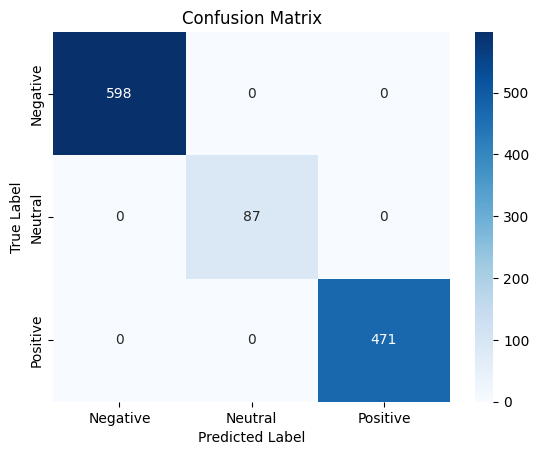

Test Accuracy: 98.00%
              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00        62
     Neutral       0.82      1.00      0.90         9
    Positive       1.00      0.93      0.96        29

    accuracy                           0.98       100
   macro avg       0.94      0.98      0.95       100
weighted avg       0.98      0.98      0.98       100

                                         Review_Text Sentiment  \
0                      provider rude would recommend  Negative   
1                  staff top notch definitely return  Positive   
2            experience standard nothing exceptional   Neutral   
3    experience exceeded wonderful definitely return  Positive   
4   environment exceeded caring exceeded expectation  Positive   
..                                               ...       ...   
95                 provider made poor avoid possible  Negative   
96          provider received terrible disappointing  Negative   
97 

In [35]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

# ----------------------------------------------
# Training Phase (XGBoost with SMOTE)
# ----------------------------------------------

# Load the main dataset
df = pd.read_csv("C:\\Users\\DELL\\sentiment analysis\\cs_final_dataset_try.csv")

# Convert text data into TF-IDF features
tfidf = TfidfVectorizer(ngram_range=(1, 2), max_features=10000, min_df=1, max_df=0.9, stop_words='english')
X_tfidf = tfidf.fit_transform(df['cleaned_review'])

# Encode the 'Sentiment' column to numeric values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['Sentiment'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42, stratify=y)

# Initialize SMOTE to handle class imbalance
#smote = SMOTE(random_state=42)
#X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Initialize the XGBoost model
xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=5, random_state=42, use_label_encoder=False)

# Train the model on the oversampled data
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model on the test set
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f'XGBoost Accuracy: {accuracy_xgb * 100:.2f}%')

# Print the classification report
print(classification_report(y_test, y_pred_xgb, target_names=label_encoder.classes_))

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# ----------------------------------------------
# Testing Phase (on new review data)
# ----------------------------------------------

# List of Review_Text and corresponding Sentiment labels (Test data)
data = {
    'Review_Text': ['provider rude would recommend', 'staff top notch definitely return', 'experience standard nothing exceptional', 'experience exceeded wonderful definitely return', 'environment exceeded caring exceeded expectation', 'visit received poor disappointing', 'service made poor multiple mistake made', 'service mediocre mixed feeling', 'provider felt welcoming happier', 'staff received worst disappointing', 'experience felt dissatisfied disappointing', 'service fine mixed feeling', 'environment exceeded wonderful exceeded expectation', 'environment received welcoming highly recommended', 'provider felt terrible multiple mistake made', 'staff worst disappointing', 'experience felt terrible multiple mistake made', 'provider made neglected coming back', 'service met decent mixed feeling', 'staff best highly recommended', 'staff received slow avoid possible', 'service made rude multiple mistake made', 'staff exceeded welcoming professional', 'staff made worst disappointing', 'staff received bad would recommend', 'staff received neglected avoid possible', 'staff dissatisfied multiple mistake made', 'visit okay neither good bad', 'visit received frustrating avoid possible', 'service felt standard met basic expectation', 'attention best happier', 'provider exceeded fantastic exceeded expectation', 'provider disappointing disappointing', 'experience felt satisfied happier', 'attention great professional', 'experience felt poor disappointing', 'staff felt slow would recommend', 'experience received disappointing coming back', 'service met average neither good bad', 'staff felt wonderful professional', 'provider made dissatisfied avoid possible', 'staff felt disappointing coming back', 'staff received fantastic definitely return', 'service mediocre mixed feeling', 'experience received disappointing disappointing', 'experience felt mediocre nothing exceptional', 'attention received excellent happier', 'attention received fantastic definitely return', 'experience exceeded top notch happier', 'provider disappointing coming back', 'experience made disappointing disappointing', 'experience made frustrating would recommend', 'service okay met basic expectation', 'visit received neglected disappointing', 'experience bad would recommend', 'provider made dissatisfied avoid possible', 'service met mediocre neither good bad', 'provider frustrating avoid possible', 'provider felt best exceeded expectation', 'provider exceeded great exceeded expectation', 'experience felt best professional', 'experience met mixed neither good bad', 'staff felt poor disappointing', 'staff neglected disappointing', 'staff made rude disappointing', 'service terrible coming back', 'experience mixed neither good bad', 'provider received bad multiple mistake made', 'provider received welcoming happier', 'service frustrating would recommend', 'experience felt excellent exceeded expectation', 'service felt poor would recommend', 'service received disappointing would recommend', 'service met decent neither good bad', 'service excellent definitely return', 'staff felt disappointing avoid possible', 'experience fantastic happier', 'attention received satisfied highly recommended', 'experience felt exceptional happier', 'attention received exceptional highly recommended', 'attention received top notch definitely return', 'visit okay ordinary', 'visit received slow would recommend', 'experience felt decent ordinary', 'experience felt ordinary mixed feeling', 'staff received satisfied highly recommended', 'service made poor avoid possible', 'visit felt dissatisfied avoid possible', 'service made poor disappointing', 'service made slow multiple mistake made', 'attention felt exceptional happier', 'service received dissatisfied multiple mistake made', 'provider dissatisfied multiple mistake made', 'provider made rude multiple mistake made', 'provider made frustrating disappointing', 'provider made poor avoid possible', 'provider received terrible disappointing', 'experience received dissatisfied avoid possible', 'experience fine neither good bad', 'provider felt terrible disappointing'],
    'Sentiment': ['Negative', 'Positive', 'Neutral', 'Positive', 'Positive', 'Negative', 'Negative', 'Neutral', 'Positive', 'Negative', 'Negative', 'Positive', 'Positive', 'Positive', 'Negative', 'Negative', 'Negative', 'Negative', 'Neutral', 'Positive', 'Negative', 'Negative', 'Positive', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Neutral', 'Positive', 'Positive', 'Negative', 'Neutral', 'Positive', 'Negative', 'Negative', 'Negative', 'Negative', 'Positive', 'Negative', 'Negative', 'Positive', 'Neutral', 'Negative', 'Neutral', 'Positive', 'Positive', 'Negative', 'Negative', 'Negative', 'Negative', 'Positive', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Positive', 'Positive', 'Positive', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Positive', 'Negative', 'Positive', 'Negative', 'Negative', 'Negative', 'Positive', 'Negative', 'Positive', 'Positive', 'Negative', 'Positive', 'Positive', 'Positive', 'Negative', 'Neutral', 'Neutral', 'Positive', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative']
}

# Create a DataFrame for the test data
df_test = pd.DataFrame(data)

# Use the fitted TF-IDF vectorizer from the training set to transform the test data
X_test_tfidf = tfidf.transform(df_test['Review_Text'])

# Encode the sentiment labels in the test set
df_test['Sentiment_Encoded'] = label_encoder.transform(df_test['Sentiment'])

# Predict the sentiment using the trained XGBoost model
y_pred_test = xgb_model.predict(X_test_tfidf)

# Evaluate the model on the test data
test_accuracy = accuracy_score(df_test['Sentiment_Encoded'], y_pred_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Print the classification report for the test data
print(classification_report(df_test['Sentiment_Encoded'], y_pred_test, target_names=label_encoder.classes_))

# Save the predictions along with the test reviews
df_test['Predicted_Sentiment'] = label_encoder.inverse_transform(y_pred_test)
df_test.to_csv('test_results_with_predictions_xg.csv', index=False)

# Print the predictions
print(df_test[['Review_Text', 'Sentiment', 'Predicted_Sentiment']])


Fitting 3 folds for each of 96 candidates, totalling 288 fits


C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [12:10:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters: {'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200, 'subsample': 0.8}
XGBoost Accuracy: 100.00%
              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00       598
     Neutral       1.00      1.00      1.00        87
    Positive       1.00      1.00      1.00       471

    accuracy                           1.00      1156
   macro avg       1.00      1.00      1.00      1156
weighted avg       1.00      1.00      1.00      1156



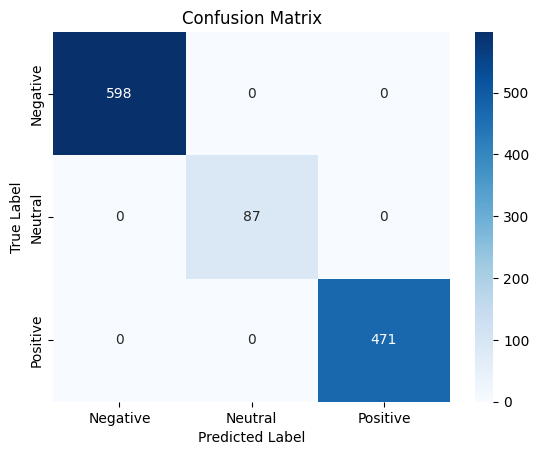

Test Accuracy: 98.00%
              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00        62
     Neutral       0.82      1.00      0.90         9
    Positive       1.00      0.93      0.96        29

    accuracy                           0.98       100
   macro avg       0.94      0.98      0.95       100
weighted avg       0.98      0.98      0.98       100

                                         Review_Text Sentiment  \
0                      provider rude would recommend  Negative   
1                  staff top notch definitely return  Positive   
2            experience standard nothing exceptional   Neutral   
3    experience exceeded wonderful definitely return  Positive   
4   environment exceeded caring exceeded expectation  Positive   
..                                               ...       ...   
95                 provider made poor avoid possible  Negative   
96          provider received terrible disappointing  Negative   
97 

In [36]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
import matplotlib.pyplot as plt

# ----------------------------------------------
# Training Phase with GridSearchCV (XGBoost with TF-IDF)
# ----------------------------------------------

# Load the main dataset
df = pd.read_csv("C:\\Users\\DELL\\sentiment analysis\\cs_final_dataset_try.csv")

# Convert text data into TF-IDF features
tfidf = TfidfVectorizer(ngram_range=(1, 2), max_features=10000, min_df=1, max_df=0.9, stop_words='english')
X_tfidf = tfidf.fit_transform(df['cleaned_review'])

# Encode the 'Sentiment' column to numeric values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['Sentiment'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42, stratify=y)

# Initialize the XGBoost model
xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=3, random_state=42, use_label_encoder=False)

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200],        # Number of trees
    'max_depth': [4, 6],            # Maximum depth of trees
    'learning_rate': [0.01, 0.1], # Learning rate
    'subsample': [0.8, 1.0],           # Subsample ratio of the training instances
    'colsample_bytree': [0.8, 1.0],    # Subsample ratio of columns when constructing each tree
    'gamma': [0, 1, 5]                 # Minimum loss reduction required to make a split
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, verbose=1, n_jobs=-1, scoring='accuracy')

# Fit grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and model from the grid search
best_xgb_model = grid_search.best_estimator_
print(f"Best Parameters: {grid_search.best_params_}")

# ----------------------------------------------
# Evaluate the best model on the test set
# ----------------------------------------------

# Make predictions on the test set
y_pred_xgb = best_xgb_model.predict(X_test)

# Evaluate the model on the test set
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f'XGBoost Accuracy: {accuracy_xgb * 100:.2f}%')

# Print the classification report
print(classification_report(y_test, y_pred_xgb, target_names=label_encoder.classes_))

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# ----------------------------------------------
# Testing Phase (on new review data)
# ----------------------------------------------

# List of Review_Text and corresponding Sentiment labels (Test data)
data = {
    'Review_Text': ['provider rude would recommend', 'staff top notch definitely return', 'experience standard nothing exceptional', 'experience exceeded wonderful definitely return', 'environment exceeded caring exceeded expectation', 'visit received poor disappointing', 'service made poor multiple mistake made', 'service mediocre mixed feeling', 'provider felt welcoming happier', 'staff received worst disappointing', 'experience felt dissatisfied disappointing', 'service fine mixed feeling', 'environment exceeded wonderful exceeded expectation', 'environment received welcoming highly recommended', 'provider felt terrible multiple mistake made', 'staff worst disappointing', 'experience felt terrible multiple mistake made', 'provider made neglected coming back', 'service met decent mixed feeling', 'staff best highly recommended', 'staff received slow avoid possible', 'service made rude multiple mistake made', 'staff exceeded welcoming professional', 'staff made worst disappointing', 'staff received bad would recommend', 'staff received neglected avoid possible', 'staff dissatisfied multiple mistake made', 'visit okay neither good bad', 'visit received frustrating avoid possible', 'service felt standard met basic expectation', 'attention best happier', 'provider exceeded fantastic exceeded expectation', 'provider disappointing disappointing', 'experience felt satisfied happier', 'attention great professional', 'experience felt poor disappointing', 'staff felt slow would recommend', 'experience received disappointing coming back', 'service met average neither good bad', 'staff felt wonderful professional', 'provider made dissatisfied avoid possible', 'staff felt disappointing coming back', 'staff received fantastic definitely return', 'service mediocre mixed feeling', 'experience received disappointing disappointing', 'experience felt mediocre nothing exceptional', 'attention received excellent happier', 'attention received fantastic definitely return', 'experience exceeded top notch happier', 'provider disappointing coming back', 'experience made disappointing disappointing', 'experience made frustrating would recommend', 'service okay met basic expectation', 'visit received neglected disappointing', 'experience bad would recommend', 'provider made dissatisfied avoid possible', 'service met mediocre neither good bad', 'provider frustrating avoid possible', 'provider felt best exceeded expectation', 'provider exceeded great exceeded expectation', 'experience felt best professional', 'experience met mixed neither good bad', 'staff felt poor disappointing', 'staff neglected disappointing', 'staff made rude disappointing', 'service terrible coming back', 'experience mixed neither good bad', 'provider received bad multiple mistake made', 'provider received welcoming happier', 'service frustrating would recommend', 'experience felt excellent exceeded expectation', 'service felt poor would recommend', 'service received disappointing would recommend', 'service met decent neither good bad', 'service excellent definitely return', 'staff felt disappointing avoid possible', 'experience fantastic happier', 'attention received satisfied highly recommended', 'experience felt exceptional happier', 'attention received exceptional highly recommended', 'attention received top notch definitely return', 'visit okay ordinary', 'visit received slow would recommend', 'experience felt decent ordinary', 'experience felt ordinary mixed feeling', 'staff received satisfied highly recommended', 'service made poor avoid possible', 'visit felt dissatisfied avoid possible', 'service made poor disappointing', 'service made slow multiple mistake made', 'attention felt exceptional happier', 'service received dissatisfied multiple mistake made', 'provider dissatisfied multiple mistake made', 'provider made rude multiple mistake made', 'provider made frustrating disappointing', 'provider made poor avoid possible', 'provider received terrible disappointing', 'experience received dissatisfied avoid possible', 'experience fine neither good bad', 'provider felt terrible disappointing'],
    'Sentiment': ['Negative', 'Positive', 'Neutral', 'Positive', 'Positive', 'Negative', 'Negative', 'Neutral', 'Positive', 'Negative', 'Negative', 'Positive', 'Positive', 'Positive', 'Negative', 'Negative', 'Negative', 'Negative', 'Neutral', 'Positive', 'Negative', 'Negative', 'Positive', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Neutral', 'Positive', 'Positive', 'Negative', 'Neutral', 'Positive', 'Negative', 'Negative', 'Negative', 'Negative', 'Positive', 'Negative', 'Negative', 'Positive', 'Neutral', 'Negative', 'Neutral', 'Positive', 'Positive', 'Negative', 'Negative', 'Negative', 'Negative', 'Positive', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Positive', 'Positive', 'Positive', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Positive', 'Negative', 'Positive', 'Negative', 'Negative', 'Negative', 'Positive', 'Negative', 'Positive', 'Positive', 'Negative', 'Positive', 'Positive', 'Positive', 'Negative', 'Neutral', 'Neutral', 'Positive', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative']
}

# Create a DataFrame for the test data
df_test = pd.DataFrame(data)

# Use the fitted TF-IDF vectorizer from the training set to transform the test data
X_test_tfidf = tfidf.transform(df_test['Review_Text'])

# Encode the sentiment labels in the test set
df_test['Sentiment_Encoded'] = label_encoder.transform(df_test['Sentiment'])

# Predict the sentiment using the trained XGBoost model
y_pred_test = best_xgb_model.predict(X_test_tfidf)

# Evaluate the model on the test data
test_accuracy = accuracy_score(df_test['Sentiment_Encoded'], y_pred_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Print the classification report for the test data
print(classification_report(df_test['Sentiment_Encoded'], y_pred_test, target_names=label_encoder.classes_))

# Save the predictions along with the test reviews
df_test['Predicted_Sentiment'] = label_encoder.inverse_transform(y_pred_test)
df_test.to_csv('test_results_with_predictions.csv', index=False)

# Print the predictions
print(df_test[['Review_Text', 'Sentiment', 'Predicted_Sentiment']])


Fitting 3 folds for each of 50 candidates, totalling 150 fits


C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [12:16:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters: {'subsample': 0.9, 'n_estimators': 100, 'min_child_weight': 1, 'max_depth': 3, 'learning_rate': 0.5, 'gamma': 0.2, 'colsample_bytree': 0.8}
XGBoost Accuracy: 100.00%
              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00       598
     Neutral       1.00      1.00      1.00        87
    Positive       1.00      1.00      1.00       471

    accuracy                           1.00      1156
   macro avg       1.00      1.00      1.00      1156
weighted avg       1.00      1.00      1.00      1156



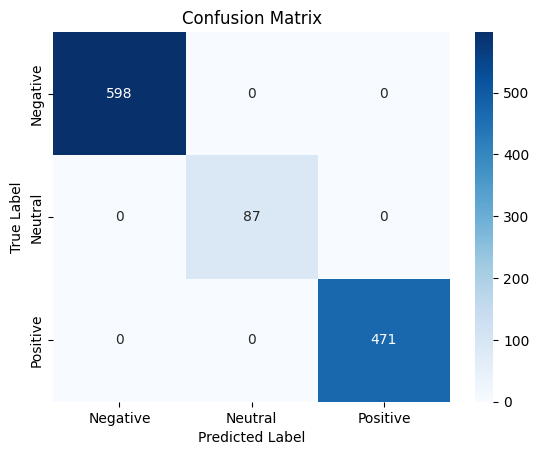

Test Accuracy: 98.00%
              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00        62
     Neutral       0.82      1.00      0.90         9
    Positive       1.00      0.93      0.96        29

    accuracy                           0.98       100
   macro avg       0.94      0.98      0.95       100
weighted avg       0.98      0.98      0.98       100

                                         Review_Text Sentiment  \
0                      provider rude would recommend  Negative   
1                  staff top notch definitely return  Positive   
2            experience standard nothing exceptional   Neutral   
3    experience exceeded wonderful definitely return  Positive   
4   environment exceeded caring exceeded expectation  Positive   
..                                               ...       ...   
95                 provider made poor avoid possible  Negative   
96          provider received terrible disappointing  Negative   
97 

In [37]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# ----------------------------------------------
# Training Phase (XGBoost with RandomizedSearchCV and SMOTE)
# ----------------------------------------------

# Load the main dataset
df = pd.read_csv("C:\\Users\\DELL\\sentiment analysis\\cs_final_dataset_try.csv")

# Convert text data into TF-IDF features
tfidf = TfidfVectorizer(ngram_range=(1, 2), max_features=10000, min_df=1, max_df=0.9, stop_words='english')
X_tfidf = tfidf.fit_transform(df['cleaned_review'])

# Encode the 'Sentiment' column to numeric values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['Sentiment'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42, stratify=y)

# Initialize SMOTE to handle class imbalance (optional)
#smote = SMOTE(random_state=42)
#X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Define the parameter grid for RandomizedSearchCV
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.01, 0.1, 0.3, 0.5],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3],
    'min_child_weight': [1, 3, 5],
}

# Initialize the XGBoost model
xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=5, random_state=42, use_label_encoder=False)

# Initialize RandomizedSearchCV for hyperparameter tuning
random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_grid,
                                   n_iter=50, scoring='accuracy', cv=3, verbose=2, random_state=42, n_jobs=-1)

# Perform the random search
random_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = random_search.best_params_
print(f"Best Parameters: {best_params}")

# Train the model with the best hyperparameters
xgb_best = random_search.best_estimator_

# Make predictions on the test set
y_pred_xgb = xgb_best.predict(X_test)

# Evaluate the model on the test set
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f'XGBoost Accuracy: {accuracy_xgb * 100:.2f}%')

# Print the classification report
print(classification_report(y_test, y_pred_xgb, target_names=label_encoder.classes_))

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# ----------------------------------------------
# Testing Phase (on new review data)
# ----------------------------------------------

# List of Review_Text and corresponding Sentiment labels (Test data)
data = {
    'Review_Text': ['provider rude would recommend', 'staff top notch definitely return', 'experience standard nothing exceptional', 'experience exceeded wonderful definitely return', 'environment exceeded caring exceeded expectation', 'visit received poor disappointing', 'service made poor multiple mistake made', 'service mediocre mixed feeling', 'provider felt welcoming happier', 'staff received worst disappointing', 'experience felt dissatisfied disappointing', 'service fine mixed feeling', 'environment exceeded wonderful exceeded expectation', 'environment received welcoming highly recommended', 'provider felt terrible multiple mistake made', 'staff worst disappointing', 'experience felt terrible multiple mistake made', 'provider made neglected coming back', 'service met decent mixed feeling', 'staff best highly recommended', 'staff received slow avoid possible', 'service made rude multiple mistake made', 'staff exceeded welcoming professional', 'staff made worst disappointing', 'staff received bad would recommend', 'staff received neglected avoid possible', 'staff dissatisfied multiple mistake made', 'visit okay neither good bad', 'visit received frustrating avoid possible', 'service felt standard met basic expectation', 'attention best happier', 'provider exceeded fantastic exceeded expectation', 'provider disappointing disappointing', 'experience felt satisfied happier', 'attention great professional', 'experience felt poor disappointing', 'staff felt slow would recommend', 'experience received disappointing coming back', 'service met average neither good bad', 'staff felt wonderful professional', 'provider made dissatisfied avoid possible', 'staff felt disappointing coming back', 'staff received fantastic definitely return', 'service mediocre mixed feeling', 'experience received disappointing disappointing', 'experience felt mediocre nothing exceptional', 'attention received excellent happier', 'attention received fantastic definitely return', 'experience exceeded top notch happier', 'provider disappointing coming back', 'experience made disappointing disappointing', 'experience made frustrating would recommend', 'service okay met basic expectation', 'visit received neglected disappointing', 'experience bad would recommend', 'provider made dissatisfied avoid possible', 'service met mediocre neither good bad', 'provider frustrating avoid possible', 'provider felt best exceeded expectation', 'provider exceeded great exceeded expectation', 'experience felt best professional', 'experience met mixed neither good bad', 'staff felt poor disappointing', 'staff neglected disappointing', 'staff made rude disappointing', 'service terrible coming back', 'experience mixed neither good bad', 'provider received bad multiple mistake made', 'provider received welcoming happier', 'service frustrating would recommend', 'experience felt excellent exceeded expectation', 'service felt poor would recommend', 'service received disappointing would recommend', 'service met decent neither good bad', 'service excellent definitely return', 'staff felt disappointing avoid possible', 'experience fantastic happier', 'attention received satisfied highly recommended', 'experience felt exceptional happier', 'attention received exceptional highly recommended', 'attention received top notch definitely return', 'visit okay ordinary', 'visit received slow would recommend', 'experience felt decent ordinary', 'experience felt ordinary mixed feeling', 'staff received satisfied highly recommended', 'service made poor avoid possible', 'visit felt dissatisfied avoid possible', 'service made poor disappointing', 'service made slow multiple mistake made', 'attention felt exceptional happier', 'service received dissatisfied multiple mistake made', 'provider dissatisfied multiple mistake made', 'provider made rude multiple mistake made', 'provider made frustrating disappointing', 'provider made poor avoid possible', 'provider received terrible disappointing', 'experience received dissatisfied avoid possible', 'experience fine neither good bad', 'provider felt terrible disappointing'],
    'Sentiment': ['Negative', 'Positive', 'Neutral', 'Positive', 'Positive', 'Negative', 'Negative', 'Neutral', 'Positive', 'Negative', 'Negative', 'Positive', 'Positive', 'Positive', 'Negative', 'Negative', 'Negative', 'Negative', 'Neutral', 'Positive', 'Negative', 'Negative', 'Positive', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Neutral', 'Positive', 'Positive', 'Negative', 'Neutral', 'Positive', 'Negative', 'Negative', 'Negative', 'Negative', 'Positive', 'Negative', 'Negative', 'Positive', 'Neutral', 'Negative', 'Neutral', 'Positive', 'Positive', 'Negative', 'Negative', 'Negative', 'Negative', 'Positive', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Positive', 'Positive', 'Positive', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Positive', 'Negative', 'Positive', 'Negative', 'Negative', 'Negative', 'Positive', 'Negative', 'Positive', 'Positive', 'Negative', 'Positive', 'Positive', 'Positive', 'Negative', 'Neutral', 'Neutral', 'Positive', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative']
}
# Create a DataFrame for the test data
df_test = pd.DataFrame(data)

# Use the fitted TF-IDF vectorizer from the training set to transform the test data
X_test_tfidf = tfidf.transform(df_test['Review_Text'])

# Encode the sentiment labels in the test set
df_test['Sentiment_Encoded'] = label_encoder.transform(df_test['Sentiment'])

# Predict the sentiment using the trained XGBoost model
y_pred_test = xgb_best.predict(X_test_tfidf)

# Evaluate the model on the test data
test_accuracy = accuracy_score(df_test['Sentiment_Encoded'], y_pred_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Print the classification report for the test data
print(classification_report(df_test['Sentiment_Encoded'], y_pred_test, target_names=label_encoder.classes_))

# Save the predictions along with the test reviews
df_test['Predicted_Sentiment'] = label_encoder.inverse_transform(y_pred_test)
df_test.to_csv('test_results_with_predictions_xg.csv', index=False)

# Print the predictions
print(df_test[['Review_Text', 'Sentiment', 'Predicted_Sentiment']])


SVM Accuracy with SMOTE-Tomek: 100.00%
              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00       598
     Neutral       1.00      1.00      1.00        87
    Positive       1.00      1.00      1.00       471

    accuracy                           1.00      1156
   macro avg       1.00      1.00      1.00      1156
weighted avg       1.00      1.00      1.00      1156



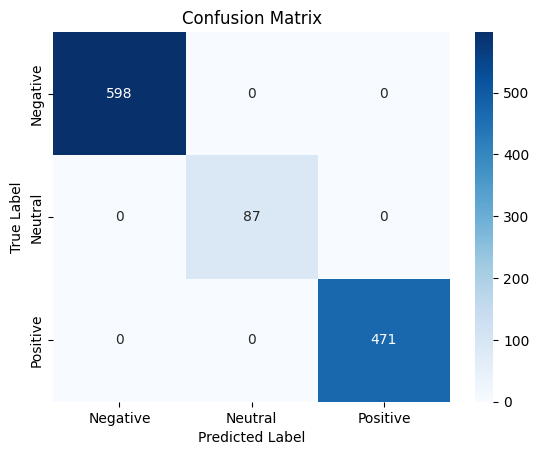

Test Accuracy: 98.00%
              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00        62
     Neutral       0.82      1.00      0.90         9
    Positive       1.00      0.93      0.96        29

    accuracy                           0.98       100
   macro avg       0.94      0.98      0.95       100
weighted avg       0.98      0.98      0.98       100

                                         Review_Text Sentiment  \
0                      provider rude would recommend  Negative   
1                  staff top notch definitely return  Positive   
2            experience standard nothing exceptional   Neutral   
3    experience exceeded wonderful definitely return  Positive   
4   environment exceeded caring exceeded expectation  Positive   
..                                               ...       ...   
95                 provider made poor avoid possible  Negative   
96          provider received terrible disappointing  Negative   
97 

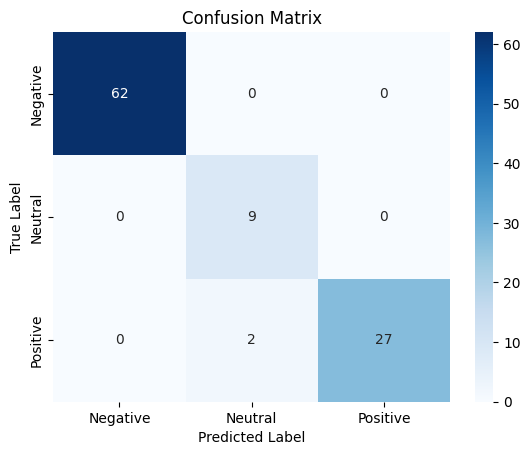

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from imblearn.combine import SMOTETomek
import seaborn as sns
import matplotlib.pyplot as plt

# ------------------------- Training Phase -------------------------
# Step 1: Load your dataset
df_train = pd.read_csv("C:\\Users\\DELL\\sentiment analysis\\cs_final_dataset_try.csv")

# Step 2: Convert text data into TF-IDF features
tfidf = TfidfVectorizer(ngram_range=(1, 2), max_features=15000, min_df=1, max_df=0.9, stop_words='english')
X_tfidf = tfidf.fit_transform(df_train['cleaned_review'])

# Step 3: Encode the 'Sentiment' column to numeric values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df_train['Sentiment'])

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42, stratify=y)

# Step 5: Apply SMOTE-Tomek to handle class imbalance
smote_tomek = SMOTETomek(random_state=42)
X_train_smote, y_train_smote = smote_tomek.fit_resample(X_train, y_train)

# Step 6: Initialize the SVM model (Support Vector Classifier)
svm_model = SVC(kernel='linear', probability=True, random_state=42)

# Step 7: Train the SVM model using the SMOTE-Tomek oversampled dataset
svm_model.fit(X_train_smote, y_train_smote)

# Step 8: Make predictions on the test set
y_pred_svm = svm_model.predict(X_test)

# Step 9: Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f'SVM Accuracy with SMOTE-Tomek: {accuracy_svm * 100:.2f}%')

# Print a classification report
print(classification_report(y_test, y_pred_svm, target_names=label_encoder.classes_))

# Step 10: Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_svm)

# Step 11: Plot confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# ------------------------- Testing Phase -------------------------
# List of Review_Text and corresponding Sentiment labels (Test data)
# Sample review text and sentiment data for model testing
data = {
    'Review_Text': ['provider rude would recommend', 'staff top notch definitely return', 'experience standard nothing exceptional', 'experience exceeded wonderful definitely return', 'environment exceeded caring exceeded expectation', 'visit received poor disappointing', 'service made poor multiple mistake made', 'service mediocre mixed feeling', 'provider felt welcoming happier', 'staff received worst disappointing', 'experience felt dissatisfied disappointing', 'service fine mixed feeling', 'environment exceeded wonderful exceeded expectation', 'environment received welcoming highly recommended', 'provider felt terrible multiple mistake made', 'staff worst disappointing', 'experience felt terrible multiple mistake made', 'provider made neglected coming back', 'service met decent mixed feeling', 'staff best highly recommended', 'staff received slow avoid possible', 'service made rude multiple mistake made', 'staff exceeded welcoming professional', 'staff made worst disappointing', 'staff received bad would recommend', 'staff received neglected avoid possible', 'staff dissatisfied multiple mistake made', 'visit okay neither good bad', 'visit received frustrating avoid possible', 'service felt standard met basic expectation', 'attention best happier', 'provider exceeded fantastic exceeded expectation', 'provider disappointing disappointing', 'experience felt satisfied happier', 'attention great professional', 'experience felt poor disappointing', 'staff felt slow would recommend', 'experience received disappointing coming back', 'service met average neither good bad', 'staff felt wonderful professional', 'provider made dissatisfied avoid possible', 'staff felt disappointing coming back', 'staff received fantastic definitely return', 'service mediocre mixed feeling', 'experience received disappointing disappointing', 'experience felt mediocre nothing exceptional', 'attention received excellent happier', 'attention received fantastic definitely return', 'experience exceeded top notch happier', 'provider disappointing coming back', 'experience made disappointing disappointing', 'experience made frustrating would recommend', 'service okay met basic expectation', 'visit received neglected disappointing', 'experience bad would recommend', 'provider made dissatisfied avoid possible', 'service met mediocre neither good bad', 'provider frustrating avoid possible', 'provider felt best exceeded expectation', 'provider exceeded great exceeded expectation', 'experience felt best professional', 'experience met mixed neither good bad', 'staff felt poor disappointing', 'staff neglected disappointing', 'staff made rude disappointing', 'service terrible coming back', 'experience mixed neither good bad', 'provider received bad multiple mistake made', 'provider received welcoming happier', 'service frustrating would recommend', 'experience felt excellent exceeded expectation', 'service felt poor would recommend', 'service received disappointing would recommend', 'service met decent neither good bad', 'service excellent definitely return', 'staff felt disappointing avoid possible', 'experience fantastic happier', 'attention received satisfied highly recommended', 'experience felt exceptional happier', 'attention received exceptional highly recommended', 'attention received top notch definitely return', 'visit okay ordinary', 'visit received slow would recommend', 'experience felt decent ordinary', 'experience felt ordinary mixed feeling', 'staff received satisfied highly recommended', 'service made poor avoid possible', 'visit felt dissatisfied avoid possible', 'service made poor disappointing', 'service made slow multiple mistake made', 'attention felt exceptional happier', 'service received dissatisfied multiple mistake made', 'provider dissatisfied multiple mistake made', 'provider made rude multiple mistake made', 'provider made frustrating disappointing', 'provider made poor avoid possible', 'provider received terrible disappointing', 'experience received dissatisfied avoid possible', 'experience fine neither good bad', 'provider felt terrible disappointing'],
    'Sentiment': ['Negative', 'Positive', 'Neutral', 'Positive', 'Positive', 'Negative', 'Negative', 'Neutral', 'Positive', 'Negative', 'Negative', 'Positive', 'Positive', 'Positive', 'Negative', 'Negative', 'Negative', 'Negative', 'Neutral', 'Positive', 'Negative', 'Negative', 'Positive', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Neutral', 'Positive', 'Positive', 'Negative', 'Neutral', 'Positive', 'Negative', 'Negative', 'Negative', 'Negative', 'Positive', 'Negative', 'Negative', 'Positive', 'Neutral', 'Negative', 'Neutral', 'Positive', 'Positive', 'Negative', 'Negative', 'Negative', 'Negative', 'Positive', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Positive', 'Positive', 'Positive', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Positive', 'Negative', 'Positive', 'Negative', 'Negative', 'Negative', 'Positive', 'Negative', 'Positive', 'Positive', 'Negative', 'Positive', 'Positive', 'Positive', 'Negative', 'Neutral', 'Neutral', 'Positive', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative']
}

# Create a DataFrame
df_test = pd.DataFrame(data)

# Step 12: Use the fitted TF-IDF vectorizer from the training set to transform the test data
X_test_tfidf = tfidf.transform(df_test['Review_Text'])  # Only use transform, no fit!

# Encode the sentiment labels in the test set
df_test['Sentiment_Encoded'] = label_encoder.transform(df_test['Sentiment'])

# Step 13: Predict the sentiment using the trained SVM model
y_pred_test = svm_model.predict(X_test_tfidf)

# Step 14: Evaluate the model on the test data
test_accuracy = accuracy_score(df_test['Sentiment_Encoded'], y_pred_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Print the classification report for the test data
print(classification_report(df_test['Sentiment_Encoded'], y_pred_test, target_names=label_encoder.classes_))

# Step 15: Save the predictions along with the test reviews
df_test['Predicted_Sentiment'] = label_encoder.inverse_transform(y_pred_test)
df_test.to_csv('test_results_with_predictions_svm.csv', index=False)

# Print the predictions
print(df_test[['Review_Text', 'Sentiment', 'Predicted_Sentiment']])


# Step 9: Generate and plot the confusion matrix
cm = confusion_matrix(df_test['Sentiment_Encoded'], y_pred_test)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()



Test Accuracy: 89.45%
              precision    recall  f1-score   support

    Negative       0.99      0.95      0.97       570
     Neutral       0.49      0.85      0.62        93
    Positive       0.92      0.84      0.88       493

    accuracy                           0.89      1156
   macro avg       0.80      0.88      0.82      1156
weighted avg       0.92      0.89      0.90      1156

external Test Accuracy: 93.00%


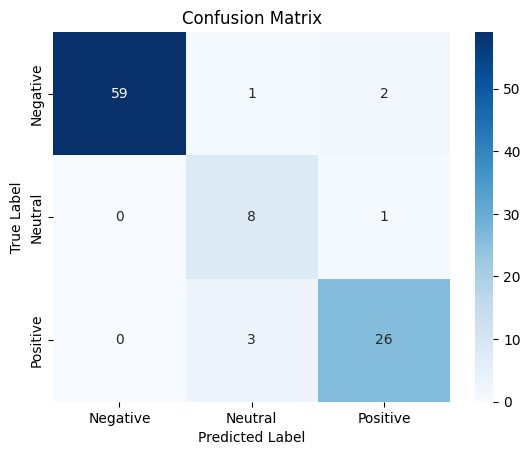

              precision    recall  f1-score   support

    Negative       1.00      0.95      0.98        62
     Neutral       0.67      0.89      0.76         9
    Positive       0.90      0.90      0.90        29

    accuracy                           0.93       100
   macro avg       0.85      0.91      0.88       100
weighted avg       0.94      0.93      0.93       100

                                         Review_Text Sentiment  \
0                      provider rude would recommend  Negative   
1                  staff top notch definitely return  Positive   
2            experience standard nothing exceptional   Neutral   
3    experience exceeded wonderful definitely return  Positive   
4   environment exceeded caring exceeded expectation  Positive   
..                                               ...       ...   
95                 provider made poor avoid possible  Negative   
96          provider received terrible disappointing  Negative   
97   experience received 

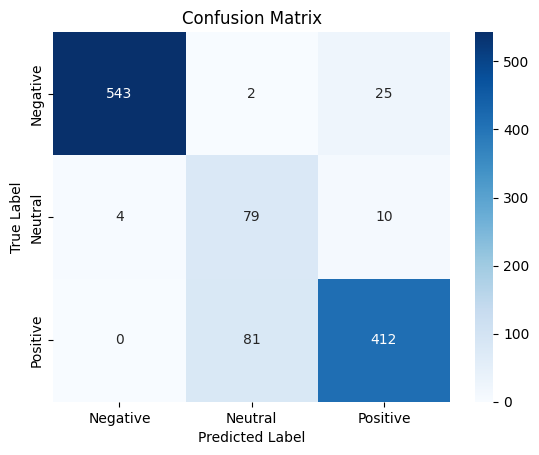

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.combine import SMOTETomek
import gensim
from gensim.models import Word2Vec
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.svm import SVC
from imblearn.combine import SMOTETomek
import seaborn as sns
import matplotlib.pyplot as plt


# Load the dataset
df = pd.read_csv("C:\\Users\\DELL\\sentiment analysis\\cs_final_dataset_try.csv")

# Preprocess the text data (assuming 'cleaned_review' column exists in the dataset)
df['cleaned_review'] = df['cleaned_review'].apply(lambda x: x.split())

# Encode the 'Sentiment' column to numeric values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['Sentiment'])

# Train a Word2Vec model on your dataset
word2vec_model = Word2Vec(sentences=df['cleaned_review'], vector_size=100, window=5, min_count=2, workers=4, sg=0)

# Generate sentence embeddings by averaging word vectors for each sentence
def get_sentence_embedding(sentence, model):
    # Get vectors for words in the sentence, ignore words not in the model
    word_vectors = [model.wv[word] for word in sentence if word in model.wv]
    
    if len(word_vectors) == 0:
        # If no word vector found, return a zero vector
        return np.zeros(model.vector_size)
    
    return np.mean(word_vectors, axis=0)

# Apply the function to each review to get sentence embeddings
X = np.array([get_sentence_embedding(sentence, word2vec_model) for sentence in df['cleaned_review']])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize SMOTETomek to handle class imbalance
smote_tomek = SMOTETomek(random_state=42)
X_train_smote, y_train_smote = smote_tomek.fit_resample(X_train, y_train)

# Step 6: Initialize the SVM model (Support Vector Classifier)
svm_model = SVC(kernel='linear', probability=True, random_state=42)

# Train the model on the oversampled data
svm_model.fit(X_train_smote, y_train_smote)  # Use svm_model here

# Make predictions on the test set
y_pred = svm_model.predict(X_test)  # Use svm_model here


# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

# Print classification report
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Sample review text and sentiment data for model testing
data = {
    'Review_Text': ['provider rude would recommend', 'staff top notch definitely return', 'experience standard nothing exceptional', 'experience exceeded wonderful definitely return', 'environment exceeded caring exceeded expectation', 'visit received poor disappointing', 'service made poor multiple mistake made', 'service mediocre mixed feeling', 'provider felt welcoming happier', 'staff received worst disappointing', 'experience felt dissatisfied disappointing', 'service fine mixed feeling', 'environment exceeded wonderful exceeded expectation', 'environment received welcoming highly recommended', 'provider felt terrible multiple mistake made', 'staff worst disappointing', 'experience felt terrible multiple mistake made', 'provider made neglected coming back', 'service met decent mixed feeling', 'staff best highly recommended', 'staff received slow avoid possible', 'service made rude multiple mistake made', 'staff exceeded welcoming professional', 'staff made worst disappointing', 'staff received bad would recommend', 'staff received neglected avoid possible', 'staff dissatisfied multiple mistake made', 'visit okay neither good bad', 'visit received frustrating avoid possible', 'service felt standard met basic expectation', 'attention best happier', 'provider exceeded fantastic exceeded expectation', 'provider disappointing disappointing', 'experience felt satisfied happier', 'attention great professional', 'experience felt poor disappointing', 'staff felt slow would recommend', 'experience received disappointing coming back', 'service met average neither good bad', 'staff felt wonderful professional', 'provider made dissatisfied avoid possible', 'staff felt disappointing coming back', 'staff received fantastic definitely return', 'service mediocre mixed feeling', 'experience received disappointing disappointing', 'experience felt mediocre nothing exceptional', 'attention received excellent happier', 'attention received fantastic definitely return', 'experience exceeded top notch happier', 'provider disappointing coming back', 'experience made disappointing disappointing', 'experience made frustrating would recommend', 'service okay met basic expectation', 'visit received neglected disappointing', 'experience bad would recommend', 'provider made dissatisfied avoid possible', 'service met mediocre neither good bad', 'provider frustrating avoid possible', 'provider felt best exceeded expectation', 'provider exceeded great exceeded expectation', 'experience felt best professional', 'experience met mixed neither good bad', 'staff felt poor disappointing', 'staff neglected disappointing', 'staff made rude disappointing', 'service terrible coming back', 'experience mixed neither good bad', 'provider received bad multiple mistake made', 'provider received welcoming happier', 'service frustrating would recommend', 'experience felt excellent exceeded expectation', 'service felt poor would recommend', 'service received disappointing would recommend', 'service met decent neither good bad', 'service excellent definitely return', 'staff felt disappointing avoid possible', 'experience fantastic happier', 'attention received satisfied highly recommended', 'experience felt exceptional happier', 'attention received exceptional highly recommended', 'attention received top notch definitely return', 'visit okay ordinary', 'visit received slow would recommend', 'experience felt decent ordinary', 'experience felt ordinary mixed feeling', 'staff received satisfied highly recommended', 'service made poor avoid possible', 'visit felt dissatisfied avoid possible', 'service made poor disappointing', 'service made slow multiple mistake made', 'attention felt exceptional happier', 'service received dissatisfied multiple mistake made', 'provider dissatisfied multiple mistake made', 'provider made rude multiple mistake made', 'provider made frustrating disappointing', 'provider made poor avoid possible', 'provider received terrible disappointing', 'experience received dissatisfied avoid possible', 'experience fine neither good bad', 'provider felt terrible disappointing'],
    'Sentiment': ['Negative', 'Positive', 'Neutral', 'Positive', 'Positive', 'Negative', 'Negative', 'Neutral', 'Positive', 'Negative', 'Negative', 'Positive', 'Positive', 'Positive', 'Negative', 'Negative', 'Negative', 'Negative', 'Neutral', 'Positive', 'Negative', 'Negative', 'Positive', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Neutral', 'Positive', 'Positive', 'Negative', 'Neutral', 'Positive', 'Negative', 'Negative', 'Negative', 'Negative', 'Positive', 'Negative', 'Negative', 'Positive', 'Neutral', 'Negative', 'Neutral', 'Positive', 'Positive', 'Negative', 'Negative', 'Negative', 'Negative', 'Positive', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Positive', 'Positive', 'Positive', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Positive', 'Negative', 'Positive', 'Negative', 'Negative', 'Negative', 'Positive', 'Negative', 'Positive', 'Positive', 'Negative', 'Positive', 'Positive', 'Positive', 'Negative', 'Neutral', 'Neutral', 'Positive', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative']
}

# Create a DataFrame
df_test = pd.DataFrame(data)

# Preprocess and convert test data into sentence embeddings using Word2Vec
df_test['cleaned_review'] = df_test['Review_Text'].apply(lambda x: x.split())
X_test_word2vec = np.array([get_sentence_embedding(sentence, word2vec_model) for sentence in df_test['cleaned_review']])

# Predict sentiments for new data
df_test['Predicted_Sentiment'] = label_encoder.inverse_transform(svm_model.predict(X_test_word2vec))



import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Encode true sentiment labels in the test set
df_test['Sentiment_Encoded'] = label_encoder.transform(df_test['Sentiment'])

# Calculate accuracy
test_accuracy = accuracy_score(df_test['Sentiment_Encoded'], label_encoder.transform(df_test['Predicted_Sentiment']))
print(f'external Test Accuracy: {test_accuracy * 100:.2f}%')

# Calculate confusion matrix
cm = confusion_matrix(df_test['Sentiment_Encoded'], label_encoder.transform(df_test['Predicted_Sentiment']))

# Plot confusion matrix using seaborn heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print(classification_report(df_test['Sentiment_Encoded'], label_encoder.transform(df_test['Predicted_Sentiment']), target_names=label_encoder.classes_))

# Save to CSV and print predictions
df_test.to_csv('test_results_with_word2vec_predictions.csv', index=False)
print(df_test[['Review_Text', 'Sentiment', 'Predicted_Sentiment']])

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Hyperparameters: {'C': 100, 'degree': 4, 'gamma': 'scale', 'kernel': 'poly'}
Best Model Test Accuracy: 99.65%


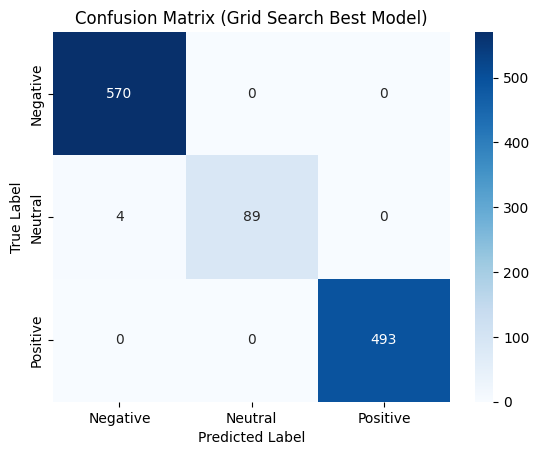

              precision    recall  f1-score   support

    Negative       0.99      1.00      1.00       570
     Neutral       1.00      0.96      0.98        93
    Positive       1.00      1.00      1.00       493

    accuracy                           1.00      1156
   macro avg       1.00      0.99      0.99      1156
weighted avg       1.00      1.00      1.00      1156



In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.combine import SMOTETomek
import gensim
from gensim.models import Word2Vec
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from imblearn.combine import SMOTETomek
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("C:\\Users\\DELL\\sentiment analysis\\cs_final_dataset_try.csv")

# Preprocess the text data
df['cleaned_review'] = df['cleaned_review'].apply(lambda x: x.split())

# Encode the 'Sentiment' column to numeric values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['Sentiment'])

# Train a Word2Vec model on your dataset
word2vec_model = Word2Vec(sentences=df['cleaned_review'], vector_size=100, window=5, min_count=2, workers=4, sg=0)

# Generate sentence embeddings
def get_sentence_embedding(sentence, model):
    word_vectors = [model.wv[word] for word in sentence if word in model.wv]
    if len(word_vectors) == 0:
        return np.zeros(model.vector_size)
    return np.mean(word_vectors, axis=0)

X = np.array([get_sentence_embedding(sentence, word2vec_model) for sentence in df['cleaned_review']])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle class imbalance with SMOTETomek
smote_tomek = SMOTETomek(random_state=42)
X_train_smote, y_train_smote = smote_tomek.fit_resample(X_train, y_train)

# Define hyperparameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4]  # Only relevant for polynomial kernel
}

# Set up GridSearchCV with SVC
grid_search = GridSearchCV(SVC(probability=True), param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the grid search
grid_search.fit(X_train_smote, y_train_smote)

# Get the best hyperparameters
print(f"Best Hyperparameters: {grid_search.best_params_}")

# Use the best model to make predictions
best_svm_model = grid_search.best_estimator_
y_pred_grid = best_svm_model.predict(X_test)

# Evaluate the performance
accuracy_grid = accuracy_score(y_test, y_pred_grid)
print(f'Best Model Test Accuracy: {accuracy_grid * 100:.2f}%')

cm_grid = confusion_matrix(y_test, y_pred_grid)
sns.heatmap(cm_grid, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Grid Search Best Model)')
plt.show()

# Print classification report
print(classification_report(y_test, y_pred_grid, target_names=label_encoder.classes_))


external Test Accuracy: 100.00%


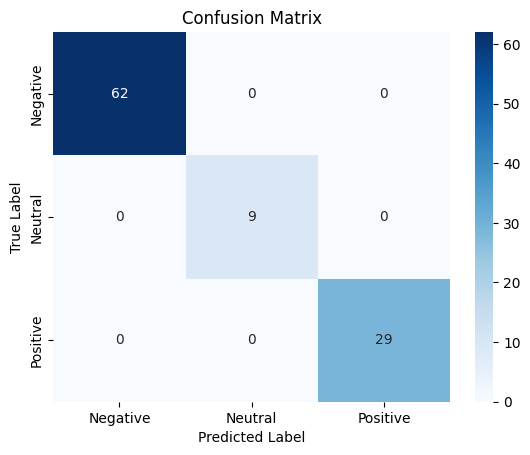

              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00        62
     Neutral       1.00      1.00      1.00         9
    Positive       1.00      1.00      1.00        29

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100

                                         Review_Text Sentiment  \
0                      provider rude would recommend  Negative   
1                  staff top notch definitely return  Positive   
2            experience standard nothing exceptional   Neutral   
3    experience exceeded wonderful definitely return  Positive   
4   environment exceeded caring exceeded expectation  Positive   
..                                               ...       ...   
95                 provider made poor avoid possible  Negative   
96          provider received terrible disappointing  Negative   
97   experience received 

In [30]:
# Sample review text and sentiment data for model testing
data = {
    'Review_Text': ['provider rude would recommend', 'staff top notch definitely return', 'experience standard nothing exceptional', 'experience exceeded wonderful definitely return', 'environment exceeded caring exceeded expectation', 'visit received poor disappointing', 'service made poor multiple mistake made', 'service mediocre mixed feeling', 'provider felt welcoming happier', 'staff received worst disappointing', 'experience felt dissatisfied disappointing', 'service fine mixed feeling', 'environment exceeded wonderful exceeded expectation', 'environment received welcoming highly recommended', 'provider felt terrible multiple mistake made', 'staff worst disappointing', 'experience felt terrible multiple mistake made', 'provider made neglected coming back', 'service met decent mixed feeling', 'staff best highly recommended', 'staff received slow avoid possible', 'service made rude multiple mistake made', 'staff exceeded welcoming professional', 'staff made worst disappointing', 'staff received bad would recommend', 'staff received neglected avoid possible', 'staff dissatisfied multiple mistake made', 'visit okay neither good bad', 'visit received frustrating avoid possible', 'service felt standard met basic expectation', 'attention best happier', 'provider exceeded fantastic exceeded expectation', 'provider disappointing disappointing', 'experience felt satisfied happier', 'attention great professional', 'experience felt poor disappointing', 'staff felt slow would recommend', 'experience received disappointing coming back', 'service met average neither good bad', 'staff felt wonderful professional', 'provider made dissatisfied avoid possible', 'staff felt disappointing coming back', 'staff received fantastic definitely return', 'service mediocre mixed feeling', 'experience received disappointing disappointing', 'experience felt mediocre nothing exceptional', 'attention received excellent happier', 'attention received fantastic definitely return', 'experience exceeded top notch happier', 'provider disappointing coming back', 'experience made disappointing disappointing', 'experience made frustrating would recommend', 'service okay met basic expectation', 'visit received neglected disappointing', 'experience bad would recommend', 'provider made dissatisfied avoid possible', 'service met mediocre neither good bad', 'provider frustrating avoid possible', 'provider felt best exceeded expectation', 'provider exceeded great exceeded expectation', 'experience felt best professional', 'experience met mixed neither good bad', 'staff felt poor disappointing', 'staff neglected disappointing', 'staff made rude disappointing', 'service terrible coming back', 'experience mixed neither good bad', 'provider received bad multiple mistake made', 'provider received welcoming happier', 'service frustrating would recommend', 'experience felt excellent exceeded expectation', 'service felt poor would recommend', 'service received disappointing would recommend', 'service met decent neither good bad', 'service excellent definitely return', 'staff felt disappointing avoid possible', 'experience fantastic happier', 'attention received satisfied highly recommended', 'experience felt exceptional happier', 'attention received exceptional highly recommended', 'attention received top notch definitely return', 'visit okay ordinary', 'visit received slow would recommend', 'experience felt decent ordinary', 'experience felt ordinary mixed feeling', 'staff received satisfied highly recommended', 'service made poor avoid possible', 'visit felt dissatisfied avoid possible', 'service made poor disappointing', 'service made slow multiple mistake made', 'attention felt exceptional happier', 'service received dissatisfied multiple mistake made', 'provider dissatisfied multiple mistake made', 'provider made rude multiple mistake made', 'provider made frustrating disappointing', 'provider made poor avoid possible', 'provider received terrible disappointing', 'experience received dissatisfied avoid possible', 'experience fine neither good bad', 'provider felt terrible disappointing'],
    'Sentiment': ['Negative', 'Positive', 'Neutral', 'Positive', 'Positive', 'Negative', 'Negative', 'Neutral', 'Positive', 'Negative', 'Negative', 'Positive', 'Positive', 'Positive', 'Negative', 'Negative', 'Negative', 'Negative', 'Neutral', 'Positive', 'Negative', 'Negative', 'Positive', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Neutral', 'Positive', 'Positive', 'Negative', 'Neutral', 'Positive', 'Negative', 'Negative', 'Negative', 'Negative', 'Positive', 'Negative', 'Negative', 'Positive', 'Neutral', 'Negative', 'Neutral', 'Positive', 'Positive', 'Negative', 'Negative', 'Negative', 'Negative', 'Positive', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Positive', 'Positive', 'Positive', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Positive', 'Negative', 'Positive', 'Negative', 'Negative', 'Negative', 'Positive', 'Negative', 'Positive', 'Positive', 'Negative', 'Positive', 'Positive', 'Positive', 'Negative', 'Neutral', 'Neutral', 'Positive', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative']
}

# Create a DataFrame
df_test = pd.DataFrame(data)

# Preprocess and convert test data into sentence embeddings using Word2Vec
df_test['cleaned_review'] = df_test['Review_Text'].apply(lambda x: x.split())
X_test_word2vec = np.array([get_sentence_embedding(sentence, word2vec_model) for sentence in df_test['cleaned_review']])

# Predict sentiments for new data
df_test['Predicted_Sentiment'] = label_encoder.inverse_transform(best_svm_model.predict(X_test_word2vec))



import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Encode true sentiment labels in the test set
df_test['Sentiment_Encoded'] = label_encoder.transform(df_test['Sentiment'])

# Calculate accuracy
test_accuracy = accuracy_score(df_test['Sentiment_Encoded'], label_encoder.transform(df_test['Predicted_Sentiment']))
print(f'external Test Accuracy: {test_accuracy * 100:.2f}%')

# Calculate confusion matrix
cm = confusion_matrix(df_test['Sentiment_Encoded'], label_encoder.transform(df_test['Predicted_Sentiment']))

# Plot confusion matrix using seaborn heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print(classification_report(df_test['Sentiment_Encoded'], label_encoder.transform(df_test['Predicted_Sentiment']), target_names=label_encoder.classes_))

# Save to CSV and print predictions
df_test.to_csv('test_results_with_word2vec_predictions.csv', index=False)
print(df_test[['Review_Text', 'Sentiment', 'Predicted_Sentiment']])



In [29]:
data_cleaned.describe()


,Rating
count,9000.000000
mean,2.995111
std,1.421494
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,5.000000


In [4]:
# Load the dataset
url_1 = "C:\\Users\\DELL\\sentiment analysis\\cleaned_data_sentiment_analysis.csv"   #url = r"C:\Users\DELL\sentiment analysis\synthetic_healthcare_reviews_with_text.csv"      #url = "C:/Users/DELL/sentiment analysis/synthetic_healthcare_reviews_with_text.csv"
df = pd.read_csv(url_1)

In [6]:
import pandas as pd
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk

# Ensure NLTK resources are downloaded
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize  SentimentIntensityAnalyzer and preprocessing tools
analyzer = SentimentIntensityAnalyzer()
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Load your dataset
df = pd.read_csv("C:\\Users\\DELL\\sentiment analysis\\cleaned_data_sentiment_analysis.csv")

# Define the text cleaning function
def clean_text(text):
    # Remove non-word characters and multiple spaces
    text = re.sub(r'\W', ' ', str(text))
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)
    text = re.sub(r'\^[a-zA-Z]\s+', ' ', text)
    text = re.sub(r'\s+', ' ', text, flags=re.I)
    text = re.sub(r'^b\s+', '', text)
    
    # Convert to lowercase
    text = text.lower()
    
    # Tokenize and remove stopwords
    words = text.split()
    words = [word for word in words if word not in stop_words]
    
    # Lemmatize the words
    words = [lemmatizer.lemmatize(word) for word in words]
    
    # Join the lemmatized words back into a single string
    return ' '.join(words)

# Apply the cleaning function to the 'Review_Text' column if it exists
if 'Review_Text' in df.columns:
    df['cleaned_review'] = df['Review_Text'].apply(clean_text)
    print(df[['Review_Text', 'cleaned_review']].head())
else:
    print("The column 'Review_Text' does not exist in the dataset.")
    
# Display the dataframe with the new 'cleaned_review' column
print(df[['cleaned_review', 'Rating']].head())

# Save the cleaned data to a new CSV file
df.to_csv('tb_analysing_cleaned_data_sentiment_analysis_fine.csv', index=False)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                                         Review_Text  \
0             The visit was average. Mixed feelings.   
1     The service had satisfied. Highly recommended.   
2        The visit was decent. Neither good nor bad.   
3  The experience was unremarkable. Nothing excep...   
4  The environment exceeded excellent. Exceeded m...   

                                      cleaned_review  
0                        visit average mixed feeling  
1               service satisfied highly recommended  
2                      visit decent neither good bad  
3        experience unremarkable nothing exceptional  
4  environment exceeded excellent exceeded expect...  
                                      cleaned_review  Rating
0                        visit average mixed feeling       2
1               service satisfied highly recommended       2
2                      visit decent neither good bad       4
3        experience unremarkable nothing exceptional       1
4  environment exceeded exce

In [13]:
print("Columns in the dataset:", df.columns)

Columns in the dataset: Index(['Review_Text', 'Rating', 'cleaned_review'], dtype='object')


In [7]:
import pandas as pd
from textblob import TextBlob

# Assuming your DataFrame is already loaded as 'df'
df = pd.read_csv('C:\\Users\\DELL\\sentiment analysis\\tb_analysing_cleaned_data_sentiment_analysis_fine.csv')

# Function to calculate polarity
def get_polarity(text):
    return TextBlob(text).sentiment.polarity

# Apply the function to the 'cleaned_review' column and create a new 'polarity' column
df['polarity'] = df['cleaned_review'].apply(get_polarity)

# Display the first few rows of the DataFrame with polarity
print(df.head())
# Save the cleaned data to a new CSV file
df.to_csv('tb_analysing_cleaned_data_sentiment_analysis_fine_polarity.csv', index=False)

                                         Review_Text  Rating  \
0             The visit was average. Mixed feelings.       2   
1     The service had satisfied. Highly recommended.       2   
2        The visit was decent. Neither good nor bad.       4   
3  The experience was unremarkable. Nothing excep...       1   
4  The environment exceeded excellent. Exceeded m...       2   

                                      cleaned_review  polarity  
0                        visit average mixed feeling -0.075000  
1               service satisfied highly recommended  0.330000  
2                      visit decent neither good bad  0.055556  
3        experience unremarkable nothing exceptional  0.666667  
4  environment exceeded excellent exceeded expect...  1.000000  


In [8]:
import pandas as pd

# Load your dataset
df = pd.read_csv("C:\\Users\\DELL\\sentiment analysis\\tb_analysing_cleaned_data_sentiment_analysis_fine_polarity.csv")

# Function to manually adjust the rating based on Compound_Score and Rating
def manually_adjust_rating(row):
    if row['polarity'] >= 0.5 and row['Rating'] <= 2:  # Strong positive sentiment
        return 5  # Set the rating to 5
    elif 0.05 <= row['polarity'] <= 0.5 and row['Rating'] <= 2:  # Mild positive sentiment
        return 4  # Set the rating to 4
    elif -0.05 <= row['polarity'] <= 0.05 :  # Neutral sentiment
        return 3  # Set the rating to 3
    elif -0.5 <= row['polarity'] <= -0.05 and row['Rating'] >= 4:  # Mild negative sentiment
        return 2  # Set the rating to 2
    elif row['polarity'] <= -0.5 and row['Rating'] >= 4:  # Strong negative sentiment
        return 1  # Set the rating to 1
    else:
        return row['Rating']  # If no conditions match, return the original rating

# Apply the manual rating adjustment based on the Compound_Score
df['Adjusted_Rating'] = df.apply(manually_adjust_rating, axis=1)

# Save the adjusted data to a new CSV file
df.to_csv('tb_sentiment_analysis_polarity_adjusted_rating.csv', index=False)

# Filter rows where the Rating or Adjusted Rating is neutral (3)
df_neutral = df[(df['Rating'] == 3) | (df['Adjusted_Rating'] == 3)]

# Save the neutral rows to a new CSV file
df_neutral.to_csv('tb_neutral_under.csv', index=False)

# Corrected Filter rows where Compound_Score is between -0.15 and 0.15 (inclusive) and specific Rating conditions
filtered_df = df_neutral[~((df_neutral['polarity'] >= -0.05) & (df_neutral['polarity'] <= 0.05)) ]

# Save the filtered neutral rows to a new CSV file
filtered_df.to_csv('tb_filtered_neutral_under.csv', index=False)

# Now, remove the filtered rows from the original dataset
neutral_filtered_dataset = df[~df.index.isin(filtered_df.index)]

# Save the final dataset without the filtered rows to a new CSV file
neutral_filtered_dataset.to_csv('tb_everything_cleared.csv', index=False)


In [9]:
df = pd.read_csv("C:\\Users\\DELL\\sentiment analysis\\tb_everything_cleared.csv")

def map_rating_to_sentiment(Adjusted_Rating):
    if Adjusted_Rating >= 4:
        return 'Positive'
    elif Adjusted_Rating == 3:
        return 'Neutral'
    else:
        return 'Negative'

# Apply the function to the 'Rating' column to create a new 'Sentiment' column
df['Sentiment'] = df['Adjusted_Rating'].apply(map_rating_to_sentiment)

# Optionally, you can drop the original 'Rating' column if it's no longer needed
# data.drop('Rating', axis=1, inplace=True)

# Display the dataframe with the new 'Sentiment' column
print(df[['cleaned_review','Rating', 'Sentiment', 'polarity', 'Adjusted_Rating']])

# Optionally, save the cleaned data to a new CSV file
df.to_csv('tb_analysing_cleaned_data_sentiment_analysis_fine_polarity_adjusted_rating_sentiment.csv', index=False)

                                         cleaned_review  Rating Sentiment  \
0                           visit average mixed feeling       2  Negative   
1                  service satisfied highly recommended       2  Positive   
2                         visit decent neither good bad       4  Positive   
3           experience unremarkable nothing exceptional       1  Positive   
4     environment exceeded excellent exceeded expect...       2  Positive   
...                                                 ...     ...       ...   
7571                  visit average nothing exceptional       2  Positive   
7572               service felt best highly recommended       4  Positive   
7573                 provider felt rude would recommend       2  Negative   
7574       provider made terrible multiple mistake made       1  Negative   
7575              service met mediocre neither good bad       5  Negative   

      polarity  Adjusted_Rating  
0    -0.075000                2  
1     0

In [12]:
# Step 1: Calculate Q1 (25th percentile) and Q3 (75th percentile) for the 'polarity' column
Q1 = df['polarity'].quantile(0.25)
Q3 = df['polarity'].quantile(0.75)

# Step 2: Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Step 3: Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lower_bound)
print(upper_bound)
# Step 4: Filter out rows where the polarity values are outliers
df_cleaned = df[(df['polarity'] >= lower_bound) & (df['polarity'] <= upper_bound)]

df_outliers = df[(df['polarity'] <lower_bound) ]

# Optional: Display or save the cleaned DataFrame without outliers
print(df_cleaned[['cleaned_review', 'Rating', 'Adjusted_Rating', 'polarity']])
print(df_outliers[['cleaned_review', 'Rating', 'Adjusted_Rating', 'polarity']])

# Save the cleaned data to a new CSV file
df_cleaned.to_csv('tb_cleaned_data_without_outliers.csv', index=False)

df_outliers.to_csv('tb_cleaned_data_outliers.csv', index=False)




-0.9950000000000001
1.125
                                         cleaned_review  Rating  \
0                           visit average mixed feeling       2   
1                  service satisfied highly recommended       2   
2                         visit decent neither good bad       4   
3           experience unremarkable nothing exceptional       1   
4     environment exceeded excellent exceeded expect...       2   
...                                                 ...     ...   
7571                  visit average nothing exceptional       2   
7572               service felt best highly recommended       4   
7573                 provider felt rude would recommend       2   
7574       provider made terrible multiple mistake made       1   
7575              service met mediocre neither good bad       5   

      Adjusted_Rating  polarity  
0                   2 -0.075000  
1                   4  0.330000  
2                   4  0.055556  
3                   5  0.666667  

In [13]:
#df = pd.read_csv("C:\\Users\\DELL\\sentiment analysis\\tb_analysing_cleaned_data_sentiment_analysis_fine_polarity_adjusted_rating_sentiment.csv")

# Filter rows where Rating and Adjusted_Rating are not equal
unequal_ratings = df[df['Rating'] != df['Adjusted_Rating']]

# Display the rows where the ratings are different
print(unequal_ratings[['cleaned_review', 'Rating', 'Adjusted_Rating', 'Sentiment', 'polarity']])

# Optionally, save the filtered data to a new CSV file
unequal_ratings.to_csv('unequal_ratings.csv', index=False)

# Filtering the dataset for specific conditions
filtered_ratings = unequal_ratings[~(((unequal_ratings['Rating'] == 2) & (unequal_ratings['Adjusted_Rating'] == 4)) |
                                     
                                     ((unequal_ratings['Rating'] == 2) & (unequal_ratings['Adjusted_Rating'] == 5)) |
                                     ((unequal_ratings['Rating'] == 1) & (unequal_ratings['Adjusted_Rating'] == 4)) |
                                     ((unequal_ratings['Rating'] == 5) & (unequal_ratings['Adjusted_Rating'] == 2)) |
                                     ((unequal_ratings['Rating'] == 4) & (unequal_ratings['Adjusted_Rating'] == 1)) |
                                   
                      ((unequal_ratings['Rating'] == 1) & (unequal_ratings['Adjusted_Rating'] == 5)) |
                     
                      ((unequal_ratings['Rating'] == 5) & (unequal_ratings['Adjusted_Rating'] == 1)) |
                      
                      
                      ((unequal_ratings['Rating'] == 5) & (unequal_ratings['Adjusted_Rating'] == 4)) |
                      
                      ((unequal_ratings['Rating'] == 4) & (unequal_ratings['Adjusted_Rating'] == 5)) |
                      
                      
                      ((unequal_ratings['Rating'] == 2) & (unequal_ratings['Adjusted_Rating'] == 1)) |
                      
                      ((unequal_ratings['Rating'] == 1) & (unequal_ratings['Adjusted_Rating'] == 2)) |
                      
                      ((unequal_ratings['Rating'] == 4) & (unequal_ratings['Adjusted_Rating'] == 2)))]

# Display the filtered data
print(filtered_ratings[['cleaned_review', 'Rating', 'Adjusted_Rating', 'Sentiment', 'polarity']])

# Optionally, save the filtered data to a new CSV file
filtered_ratings.to_csv('filtered_ratings_remove.csv', index=False)


final_dataset = df_cleaned[~df_cleaned.isin(filtered_ratings).all(axis=1)]

# Optionally, save the filtered data to a new CSV file
final_dataset.to_csv('tb_final_dataset_try.csv', index=False)


                                         cleaned_review  Rating  \
1                  service satisfied highly recommended       2   
3           experience unremarkable nothing exceptional       1   
4     environment exceeded excellent exceeded expect...       2   
6              service felt average nothing exceptional       2   
8                 experience felt okay neither good bad       2   
...                                                 ...     ...   
7567               experience ordinary neither good bad       5   
7569               experience received poor coming back       4   
7570               service dissatisfied would recommend       2   
7571                  visit average nothing exceptional       2   
7575              service met mediocre neither good bad       5   

      Adjusted_Rating Sentiment  polarity  
1                   4  Positive  0.330000  
3                   5  Positive  0.666667  
4                   5  Positive  1.000000  
6                  

In [14]:
import pandas as pd

# Load your dataset (replace with your actual file path)
df = pd.read_csv('tb_final_dataset_try.csv')

# Assuming the dataset has a 'sentiment' column with 'positive', 'negative', and 'neutral' labels
sentiment_counts = df['Sentiment'].value_counts()

# Display the counts for each sentiment category
print(sentiment_counts)


Sentiment
Positive    3286
Negative    2674
Neutral      318
Name: count, dtype: int64


In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert text data into features (assuming you have preprocessed text data in 'cleaned_review' column)
tfidf = TfidfVectorizer(ngram_range=(1, 5), max_features=15000, min_df=2, max_df=0.75, stop_words='english')
X_tfidf = tfidf.fit_transform(final_dataset['cleaned_review'])

# Encode the 'Sentiment' column to numeric values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(final_dataset['Sentiment'])



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)



# Initialize the classifier
model = RandomForestClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions (getting probabilities instead of just class labels)
y_probs = model.predict_proba(X_test)

# Calculate accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Calculate ROC-AUC for multiclass
roc_auc = roc_auc_score(y_test, y_probs, multi_class='ovr', average='macro')  # 'ovr' stands for one-vs-rest
print(f'ROC-AUC Score: {roc_auc*100:.2f}%')


Accuracy: 100.00%
ROC-AUC Score: 100.00%


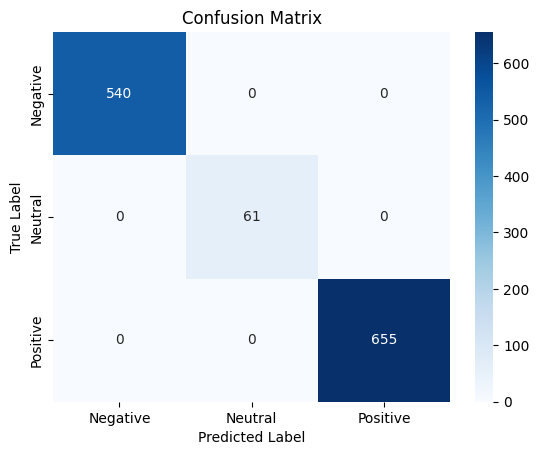

In [16]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=[0, 1, 2])  # Adjust labels based on your classes

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


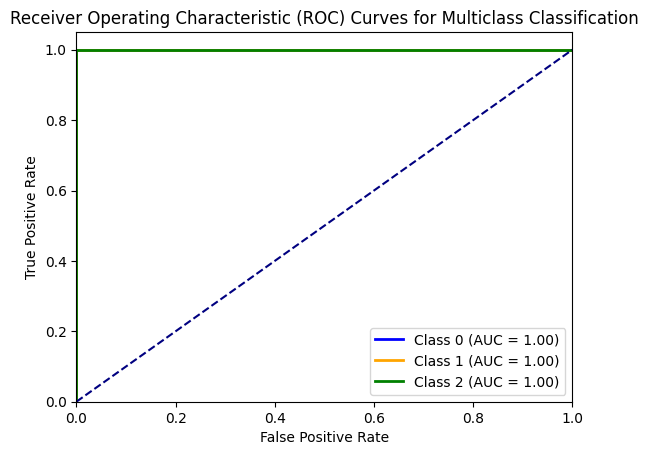

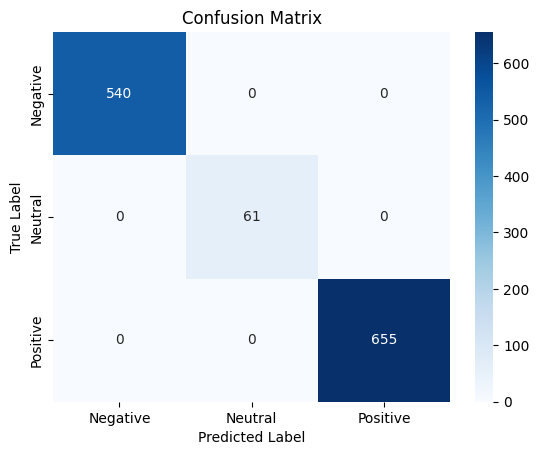

In [17]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
import numpy as np

## Binarize the output for multiclass ROC curve plotting
y_test_binarized = label_binarize(y_test, classes=np.unique(y))  # Adjust based on the number of classes
n_classes = y_test_binarized.shape[1]

# Compute ROC curve and ROC-AUC for each class
fpr = dict()
tpr = dict()
roc_auc_class = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_probs[:, i])
    roc_auc_class[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure()
colors = ['blue', 'orange', 'green']  # Adjust based on the number of classes you have
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2, label=f'Class {i} (AUC = {roc_auc_class[i]:.2f})')

# Plot diagonal line for random guessing
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')

# Set axis limits and labels
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves for Multiclass Classification')
plt.legend(loc='lower right')
plt.show()


from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=[0, 1, 2])  # Adjust labels based on your classes

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


Test Accuracy: 73.00%
              precision    recall  f1-score   support

    Negative       0.94      0.71      0.81        62
     Neutral       0.12      0.22      0.16         9
    Positive       0.73      0.93      0.82        29

    accuracy                           0.73       100
   macro avg       0.60      0.62      0.60       100
weighted avg       0.80      0.73      0.75       100

                                         Review_Text Sentiment  \
0                      provider rude would recommend  Negative   
1                  staff top notch definitely return  Positive   
2            experience standard nothing exceptional   Neutral   
3    experience exceeded wonderful definitely return  Positive   
4   environment exceeded caring exceeded expectation  Positive   
..                                               ...       ...   
95                 provider made poor avoid possible  Negative   
96          provider received terrible disappointing  Negative   
97 

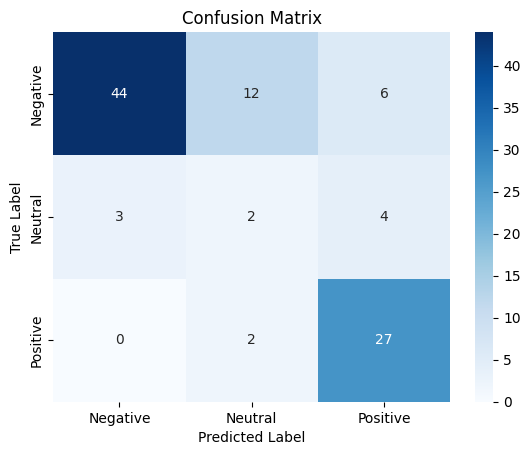

In [19]:
# Create a DataFrame for the test data
# Sample review text and sentiment data for model testing
data = {
    'Review_Text': ['provider rude would recommend', 'staff top notch definitely return', 'experience standard nothing exceptional', 'experience exceeded wonderful definitely return', 'environment exceeded caring exceeded expectation', 'visit received poor disappointing', 'service made poor multiple mistake made', 'service mediocre mixed feeling', 'provider felt welcoming happier', 'staff received worst disappointing', 'experience felt dissatisfied disappointing', 'service fine mixed feeling', 'environment exceeded wonderful exceeded expectation', 'environment received welcoming highly recommended', 'provider felt terrible multiple mistake made', 'staff worst disappointing', 'experience felt terrible multiple mistake made', 'provider made neglected coming back', 'service met decent mixed feeling', 'staff best highly recommended', 'staff received slow avoid possible', 'service made rude multiple mistake made', 'staff exceeded welcoming professional', 'staff made worst disappointing', 'staff received bad would recommend', 'staff received neglected avoid possible', 'staff dissatisfied multiple mistake made', 'visit okay neither good bad', 'visit received frustrating avoid possible', 'service felt standard met basic expectation', 'attention best happier', 'provider exceeded fantastic exceeded expectation', 'provider disappointing disappointing', 'experience felt satisfied happier', 'attention great professional', 'experience felt poor disappointing', 'staff felt slow would recommend', 'experience received disappointing coming back', 'service met average neither good bad', 'staff felt wonderful professional', 'provider made dissatisfied avoid possible', 'staff felt disappointing coming back', 'staff received fantastic definitely return', 'service mediocre mixed feeling', 'experience received disappointing disappointing', 'experience felt mediocre nothing exceptional', 'attention received excellent happier', 'attention received fantastic definitely return', 'experience exceeded top notch happier', 'provider disappointing coming back', 'experience made disappointing disappointing', 'experience made frustrating would recommend', 'service okay met basic expectation', 'visit received neglected disappointing', 'experience bad would recommend', 'provider made dissatisfied avoid possible', 'service met mediocre neither good bad', 'provider frustrating avoid possible', 'provider felt best exceeded expectation', 'provider exceeded great exceeded expectation', 'experience felt best professional', 'experience met mixed neither good bad', 'staff felt poor disappointing', 'staff neglected disappointing', 'staff made rude disappointing', 'service terrible coming back', 'experience mixed neither good bad', 'provider received bad multiple mistake made', 'provider received welcoming happier', 'service frustrating would recommend', 'experience felt excellent exceeded expectation', 'service felt poor would recommend', 'service received disappointing would recommend', 'service met decent neither good bad', 'service excellent definitely return', 'staff felt disappointing avoid possible', 'experience fantastic happier', 'attention received satisfied highly recommended', 'experience felt exceptional happier', 'attention received exceptional highly recommended', 'attention received top notch definitely return', 'visit okay ordinary', 'visit received slow would recommend', 'experience felt decent ordinary', 'experience felt ordinary mixed feeling', 'staff received satisfied highly recommended', 'service made poor avoid possible', 'visit felt dissatisfied avoid possible', 'service made poor disappointing', 'service made slow multiple mistake made', 'attention felt exceptional happier', 'service received dissatisfied multiple mistake made', 'provider dissatisfied multiple mistake made', 'provider made rude multiple mistake made', 'provider made frustrating disappointing', 'provider made poor avoid possible', 'provider received terrible disappointing', 'experience received dissatisfied avoid possible', 'experience fine neither good bad', 'provider felt terrible disappointing'],
    'Sentiment': ['Negative', 'Positive', 'Neutral', 'Positive', 'Positive', 'Negative', 'Negative', 'Neutral', 'Positive', 'Negative', 'Negative', 'Positive', 'Positive', 'Positive', 'Negative', 'Negative', 'Negative', 'Negative', 'Neutral', 'Positive', 'Negative', 'Negative', 'Positive', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Neutral', 'Positive', 'Positive', 'Negative', 'Neutral', 'Positive', 'Negative', 'Negative', 'Negative', 'Negative', 'Positive', 'Negative', 'Negative', 'Positive', 'Neutral', 'Negative', 'Neutral', 'Positive', 'Positive', 'Negative', 'Negative', 'Negative', 'Negative', 'Positive', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Positive', 'Positive', 'Positive', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Positive', 'Negative', 'Positive', 'Negative', 'Negative', 'Negative', 'Positive', 'Negative', 'Positive', 'Positive', 'Negative', 'Positive', 'Positive', 'Positive', 'Negative', 'Neutral', 'Neutral', 'Positive', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative']
}

df_test = pd.DataFrame(data)

# Step 10: Use the fitted TF-IDF vectorizer from the training set to transform the test data
X_test_tfidf = tfidf.transform(df_test['Review_Text'])

# Step 11: Calculate Compound Score for the new test data and scale it
#df_test['Compound_Score'] = df_test['Review_Text'].apply(lambda review: analyzer.polarity_scores(review)['compound'])
#compound_score_scaled_test = scaler.transform(df_test[['Compound_Score']])

# Step 12: Combine the TF-IDF test data with the scaled Compound Score
#X_test_combined = hstack([X_test_tfidf, compound_score_scaled_test])

# Step 13: Encode the sentiment labels in the test set
df_test['Sentiment_Encoded'] = label_encoder.transform(df_test['Sentiment'])

# Step 14: Predict the sentiment using the trained RandomForest model
y_pred_test = model.predict(X_test_tfidf)

# Step 15: Evaluate the model on the test data
test_accuracy = accuracy_score(df_test['Sentiment_Encoded'], y_pred_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Print the classification report for the test data
print(classification_report(df_test['Sentiment_Encoded'], y_pred_test, target_names=label_encoder.classes_))

# Step 16: Save the predictions along with the test reviews
df_test['Predicted_Sentiment'] = label_encoder.inverse_transform(y_pred_test)
df_test.to_csv('tb_test_results_with_predictions.csv', index=False)

# Print the predictions
print(df_test[['Review_Text', 'Sentiment', 'Predicted_Sentiment']])

# Step 17: Generate and Plot confusion matrix
cm = confusion_matrix(df_test['Sentiment_Encoded'], y_pred_test)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV

# Convert text data into features (assuming you have preprocessed text data in 'cleaned_review' column)
tfidf = TfidfVectorizer(ngram_range=(1, 5), max_features=15000, min_df=2, max_df=0.75, stop_words='english')
X_tfidf = tfidf.fit_transform(final_dataset['cleaned_review'])

# Encode the 'Sentiment' column to numeric values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(final_dataset['Sentiment'])



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)



# Initialize the classifier
model = RandomForestClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions (getting probabilities instead of just class labels)
y_probs = model.predict_proba(X_test)

# Calculate accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Calculate ROC-AUC for multiclass
roc_auc = roc_auc_score(y_test, y_probs, multi_class='ovr', average='macro')  # 'ovr' stands for one-vs-rest
print(f'ROC-AUC Score: {roc_auc*100:.2f}%')


# Define the hyperparameters to search over
param_grid = {
    'n_estimators': [100, 200],           # Number of trees in the forest
    'max_depth': [10, 20, 30],           # Maximum depth of the tree
    'min_samples_split': [2, 5],           # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2],             # Minimum number of samples required to be at a leaf node
    'bootstrap': [True]                 # Whether to bootstrap samples or not
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the grid search model
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best parameters found by grid search: {best_params}")

# Use the best estimator to predict and evaluate the performance
best_model = grid_search.best_estimator_

# Predict with the best model
y_pred_grid = best_model.predict(X_test)

# Calculate accuracy
accuracy_grid = accuracy_score(y_test, y_pred_grid)
print(f'Accuracy after Grid Search: {accuracy_grid * 100:.2f}%')


Accuracy: 100.00%
ROC-AUC Score: 100.00%
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters found by grid search: {'bootstrap': True, 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy after Grid Search: 97.61%


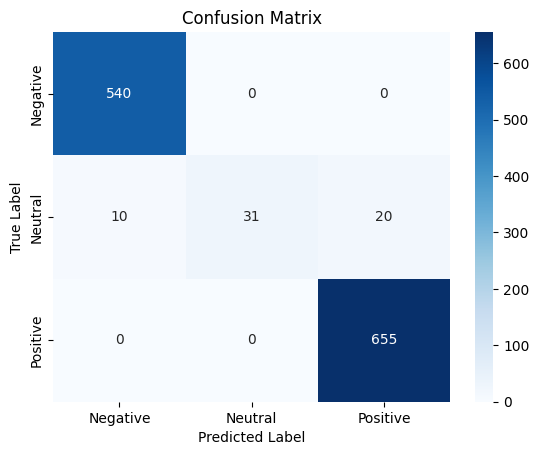

In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_grid, labels=[0, 1, 2])  # Adjust labels based on your classes

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

Test Accuracy: 72.00%
              precision    recall  f1-score   support

    Negative       0.94      0.71      0.81        62
     Neutral       0.12      0.22      0.15         9
    Positive       0.72      0.90      0.80        29

    accuracy                           0.72       100
   macro avg       0.59      0.61      0.59       100
weighted avg       0.80      0.72      0.75       100

                                         Review_Text Sentiment  \
0                      provider rude would recommend  Negative   
1                  staff top notch definitely return  Positive   
2            experience standard nothing exceptional   Neutral   
3    experience exceeded wonderful definitely return  Positive   
4   environment exceeded caring exceeded expectation  Positive   
..                                               ...       ...   
95                 provider made poor avoid possible  Negative   
96          provider received terrible disappointing  Negative   
97 

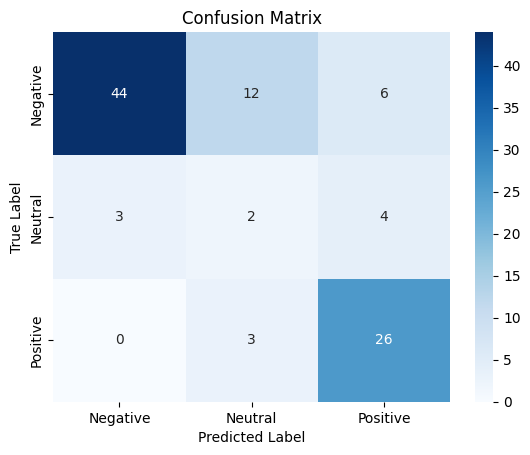

In [24]:
# Create a DataFrame for the test data
# Sample review text and sentiment data for model testing
data = {
    'Review_Text': ['provider rude would recommend', 'staff top notch definitely return', 'experience standard nothing exceptional', 'experience exceeded wonderful definitely return', 'environment exceeded caring exceeded expectation', 'visit received poor disappointing', 'service made poor multiple mistake made', 'service mediocre mixed feeling', 'provider felt welcoming happier', 'staff received worst disappointing', 'experience felt dissatisfied disappointing', 'service fine mixed feeling', 'environment exceeded wonderful exceeded expectation', 'environment received welcoming highly recommended', 'provider felt terrible multiple mistake made', 'staff worst disappointing', 'experience felt terrible multiple mistake made', 'provider made neglected coming back', 'service met decent mixed feeling', 'staff best highly recommended', 'staff received slow avoid possible', 'service made rude multiple mistake made', 'staff exceeded welcoming professional', 'staff made worst disappointing', 'staff received bad would recommend', 'staff received neglected avoid possible', 'staff dissatisfied multiple mistake made', 'visit okay neither good bad', 'visit received frustrating avoid possible', 'service felt standard met basic expectation', 'attention best happier', 'provider exceeded fantastic exceeded expectation', 'provider disappointing disappointing', 'experience felt satisfied happier', 'attention great professional', 'experience felt poor disappointing', 'staff felt slow would recommend', 'experience received disappointing coming back', 'service met average neither good bad', 'staff felt wonderful professional', 'provider made dissatisfied avoid possible', 'staff felt disappointing coming back', 'staff received fantastic definitely return', 'service mediocre mixed feeling', 'experience received disappointing disappointing', 'experience felt mediocre nothing exceptional', 'attention received excellent happier', 'attention received fantastic definitely return', 'experience exceeded top notch happier', 'provider disappointing coming back', 'experience made disappointing disappointing', 'experience made frustrating would recommend', 'service okay met basic expectation', 'visit received neglected disappointing', 'experience bad would recommend', 'provider made dissatisfied avoid possible', 'service met mediocre neither good bad', 'provider frustrating avoid possible', 'provider felt best exceeded expectation', 'provider exceeded great exceeded expectation', 'experience felt best professional', 'experience met mixed neither good bad', 'staff felt poor disappointing', 'staff neglected disappointing', 'staff made rude disappointing', 'service terrible coming back', 'experience mixed neither good bad', 'provider received bad multiple mistake made', 'provider received welcoming happier', 'service frustrating would recommend', 'experience felt excellent exceeded expectation', 'service felt poor would recommend', 'service received disappointing would recommend', 'service met decent neither good bad', 'service excellent definitely return', 'staff felt disappointing avoid possible', 'experience fantastic happier', 'attention received satisfied highly recommended', 'experience felt exceptional happier', 'attention received exceptional highly recommended', 'attention received top notch definitely return', 'visit okay ordinary', 'visit received slow would recommend', 'experience felt decent ordinary', 'experience felt ordinary mixed feeling', 'staff received satisfied highly recommended', 'service made poor avoid possible', 'visit felt dissatisfied avoid possible', 'service made poor disappointing', 'service made slow multiple mistake made', 'attention felt exceptional happier', 'service received dissatisfied multiple mistake made', 'provider dissatisfied multiple mistake made', 'provider made rude multiple mistake made', 'provider made frustrating disappointing', 'provider made poor avoid possible', 'provider received terrible disappointing', 'experience received dissatisfied avoid possible', 'experience fine neither good bad', 'provider felt terrible disappointing'],
    'Sentiment': ['Negative', 'Positive', 'Neutral', 'Positive', 'Positive', 'Negative', 'Negative', 'Neutral', 'Positive', 'Negative', 'Negative', 'Positive', 'Positive', 'Positive', 'Negative', 'Negative', 'Negative', 'Negative', 'Neutral', 'Positive', 'Negative', 'Negative', 'Positive', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Neutral', 'Positive', 'Positive', 'Negative', 'Neutral', 'Positive', 'Negative', 'Negative', 'Negative', 'Negative', 'Positive', 'Negative', 'Negative', 'Positive', 'Neutral', 'Negative', 'Neutral', 'Positive', 'Positive', 'Negative', 'Negative', 'Negative', 'Negative', 'Positive', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Positive', 'Positive', 'Positive', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Positive', 'Negative', 'Positive', 'Negative', 'Negative', 'Negative', 'Positive', 'Negative', 'Positive', 'Positive', 'Negative', 'Positive', 'Positive', 'Positive', 'Negative', 'Neutral', 'Neutral', 'Positive', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative']
}

df_test = pd.DataFrame(data)

# Step 10: Use the fitted TF-IDF vectorizer from the training set to transform the test data
X_test_tfidf = tfidf.transform(df_test['Review_Text'])

# Step 11: Calculate Compound Score for the new test data and scale it
#df_test['Compound_Score'] = df_test['Review_Text'].apply(lambda review: analyzer.polarity_scores(review)['compound'])
#compound_score_scaled_test = scaler.transform(df_test[['Compound_Score']])

# Step 12: Combine the TF-IDF test data with the scaled Compound Score
#X_test_combined = hstack([X_test_tfidf, compound_score_scaled_test])

# Step 13: Encode the sentiment labels in the test set
df_test['Sentiment_Encoded'] = label_encoder.transform(df_test['Sentiment'])

# Step 14: Predict the sentiment using the trained RandomForest model
y_pred_test = model.predict(X_test_tfidf)

# Step 15: Evaluate the model on the test data
test_accuracy = accuracy_score(df_test['Sentiment_Encoded'], y_pred_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Print the classification report for the test data
print(classification_report(df_test['Sentiment_Encoded'], y_pred_test, target_names=label_encoder.classes_))

# Step 16: Save the predictions along with the test reviews
df_test['Predicted_Sentiment'] = label_encoder.inverse_transform(y_pred_test)
df_test.to_csv('test_results_with_predictions.csv', index=False)

# Print the predictions
print(df_test[['Review_Text', 'Sentiment', 'Predicted_Sentiment']])

# Step 17: Generate and Plot confusion matrix
cm = confusion_matrix(df_test['Sentiment_Encoded'], y_pred_test)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [25]:
import pandas as pd
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, label_binarize
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np


from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Define the parameter space
param_dist = {
    'n_estimators': np.arange(100, 500, 100),  # Range of trees
    'max_depth': [10, 20, 30, None],           # Maximum depth of the tree
    'min_samples_split': np.arange(2, 10, 2),  # Number of samples required to split
    'min_samples_leaf': np.arange(1, 5, 1),    # Number of samples required in each leaf node
    'bootstrap': [True, False]                 # Whether to use bootstrap sampling
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=RandomForestClassifier(),
                                   param_distributions=param_dist,
                                   n_iter=20, cv=5, verbose=2, random_state=42, n_jobs=-1)

# Fit the Randomized Search model
random_search.fit(X_train, y_train)

# Get the best parameters and the best model
best_params_random = random_search.best_params_
best_model_random = random_search.best_estimator_

print(f"Best parameters found by Randomized Search: {best_params_random}")


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters found by Randomized Search: {'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None, 'bootstrap': True}


Accuracy after Randomized Search: 100.00%
Test Accuracy: 72.00%
              precision    recall  f1-score   support

    Negative       0.94      0.71      0.81        62
     Neutral       0.12      0.22      0.15         9
    Positive       0.72      0.90      0.80        29

    accuracy                           0.72       100
   macro avg       0.59      0.61      0.59       100
weighted avg       0.80      0.72      0.75       100

                                         Review_Text Sentiment  \
0                      provider rude would recommend  Negative   
1                  staff top notch definitely return  Positive   
2            experience standard nothing exceptional   Neutral   
3    experience exceeded wonderful definitely return  Positive   
4   environment exceeded caring exceeded expectation  Positive   
..                                               ...       ...   
95                 provider made poor avoid possible  Negative   
96          provider receiv

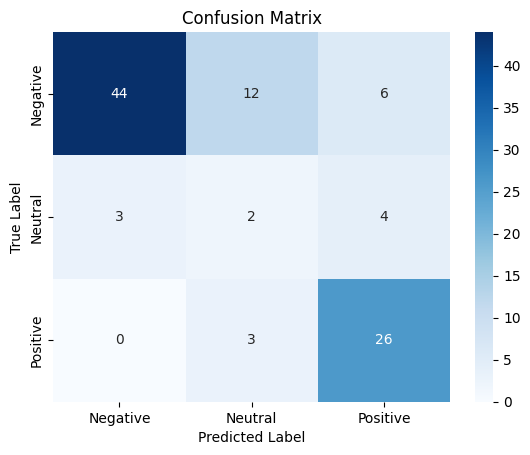

In [26]:
from sklearn.metrics import accuracy_score
# Predict using the best model found by RandomizedSearchCV
y_pred_random = best_model_random.predict(X_test)

# Calculate the accuracy on the test set
accuracy_random = accuracy_score(y_test, y_pred_random)

# Print the accuracy
print(f'Accuracy after Randomized Search: {accuracy_random * 100:.2f}%')


# Create a DataFrame for the test data
# Sample review text and sentiment data for model testing
data = {
    'Review_Text': ['provider rude would recommend', 'staff top notch definitely return', 'experience standard nothing exceptional', 'experience exceeded wonderful definitely return', 'environment exceeded caring exceeded expectation', 'visit received poor disappointing', 'service made poor multiple mistake made', 'service mediocre mixed feeling', 'provider felt welcoming happier', 'staff received worst disappointing', 'experience felt dissatisfied disappointing', 'service fine mixed feeling', 'environment exceeded wonderful exceeded expectation', 'environment received welcoming highly recommended', 'provider felt terrible multiple mistake made', 'staff worst disappointing', 'experience felt terrible multiple mistake made', 'provider made neglected coming back', 'service met decent mixed feeling', 'staff best highly recommended', 'staff received slow avoid possible', 'service made rude multiple mistake made', 'staff exceeded welcoming professional', 'staff made worst disappointing', 'staff received bad would recommend', 'staff received neglected avoid possible', 'staff dissatisfied multiple mistake made', 'visit okay neither good bad', 'visit received frustrating avoid possible', 'service felt standard met basic expectation', 'attention best happier', 'provider exceeded fantastic exceeded expectation', 'provider disappointing disappointing', 'experience felt satisfied happier', 'attention great professional', 'experience felt poor disappointing', 'staff felt slow would recommend', 'experience received disappointing coming back', 'service met average neither good bad', 'staff felt wonderful professional', 'provider made dissatisfied avoid possible', 'staff felt disappointing coming back', 'staff received fantastic definitely return', 'service mediocre mixed feeling', 'experience received disappointing disappointing', 'experience felt mediocre nothing exceptional', 'attention received excellent happier', 'attention received fantastic definitely return', 'experience exceeded top notch happier', 'provider disappointing coming back', 'experience made disappointing disappointing', 'experience made frustrating would recommend', 'service okay met basic expectation', 'visit received neglected disappointing', 'experience bad would recommend', 'provider made dissatisfied avoid possible', 'service met mediocre neither good bad', 'provider frustrating avoid possible', 'provider felt best exceeded expectation', 'provider exceeded great exceeded expectation', 'experience felt best professional', 'experience met mixed neither good bad', 'staff felt poor disappointing', 'staff neglected disappointing', 'staff made rude disappointing', 'service terrible coming back', 'experience mixed neither good bad', 'provider received bad multiple mistake made', 'provider received welcoming happier', 'service frustrating would recommend', 'experience felt excellent exceeded expectation', 'service felt poor would recommend', 'service received disappointing would recommend', 'service met decent neither good bad', 'service excellent definitely return', 'staff felt disappointing avoid possible', 'experience fantastic happier', 'attention received satisfied highly recommended', 'experience felt exceptional happier', 'attention received exceptional highly recommended', 'attention received top notch definitely return', 'visit okay ordinary', 'visit received slow would recommend', 'experience felt decent ordinary', 'experience felt ordinary mixed feeling', 'staff received satisfied highly recommended', 'service made poor avoid possible', 'visit felt dissatisfied avoid possible', 'service made poor disappointing', 'service made slow multiple mistake made', 'attention felt exceptional happier', 'service received dissatisfied multiple mistake made', 'provider dissatisfied multiple mistake made', 'provider made rude multiple mistake made', 'provider made frustrating disappointing', 'provider made poor avoid possible', 'provider received terrible disappointing', 'experience received dissatisfied avoid possible', 'experience fine neither good bad', 'provider felt terrible disappointing'],
    'Sentiment': ['Negative', 'Positive', 'Neutral', 'Positive', 'Positive', 'Negative', 'Negative', 'Neutral', 'Positive', 'Negative', 'Negative', 'Positive', 'Positive', 'Positive', 'Negative', 'Negative', 'Negative', 'Negative', 'Neutral', 'Positive', 'Negative', 'Negative', 'Positive', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Neutral', 'Positive', 'Positive', 'Negative', 'Neutral', 'Positive', 'Negative', 'Negative', 'Negative', 'Negative', 'Positive', 'Negative', 'Negative', 'Positive', 'Neutral', 'Negative', 'Neutral', 'Positive', 'Positive', 'Negative', 'Negative', 'Negative', 'Negative', 'Positive', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Positive', 'Positive', 'Positive', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Positive', 'Negative', 'Positive', 'Negative', 'Negative', 'Negative', 'Positive', 'Negative', 'Positive', 'Positive', 'Negative', 'Positive', 'Positive', 'Positive', 'Negative', 'Neutral', 'Neutral', 'Positive', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative']
}

df_test = pd.DataFrame(data)

# Step 10: Use the fitted TF-IDF vectorizer from the training set to transform the test data
X_test_tfidf = tfidf.transform(df_test['Review_Text'])

# Step 11: Calculate Compound Score for the new test data and scale it
#df_test['Compound_Score'] = df_test['Review_Text'].apply(lambda review: analyzer.polarity_scores(review)['compound'])
#compound_score_scaled_test = scaler.transform(df_test[['Compound_Score']])

# Step 12: Combine the TF-IDF test data with the scaled Compound Score
#X_test_combined = hstack([X_test_tfidf, compound_score_scaled_test])

# Step 13: Encode the sentiment labels in the test set
df_test['Sentiment_Encoded'] = label_encoder.transform(df_test['Sentiment'])

# Step 14: Predict the sentiment using the trained RandomForest model
y_pred_test = model.predict(X_test_tfidf)

# Step 15: Evaluate the model on the test data
test_accuracy = accuracy_score(df_test['Sentiment_Encoded'], y_pred_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Print the classification report for the test data
print(classification_report(df_test['Sentiment_Encoded'], y_pred_test, target_names=label_encoder.classes_))

# Step 16: Save the predictions along with the test reviews
df_test['Predicted_Sentiment'] = label_encoder.inverse_transform(y_pred_test)
df_test.to_csv('test_results_with_predictions.csv', index=False)

# Print the predictions
print(df_test[['Review_Text', 'Sentiment', 'Predicted_Sentiment']])

# Step 17: Generate and Plot confusion matrix
cm = confusion_matrix(df_test['Sentiment_Encoded'], y_pred_test)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 96.74%
Precision: 96.74%
Recall: 96.74%
F1 Score: 96.74%
ROC-AUC: 98.86%
Test Accuracy: 73.00%
              precision    recall  f1-score   support

    Negative       0.88      0.74      0.81        62
     Neutral       0.12      0.22      0.15         9
    Positive       0.81      0.86      0.83        29

    accuracy                           0.73       100
   macro avg       0.60      0.61      0.60       100
weighted avg       0.79      0.73      0.76       100

                                         Review_Text Sentiment  \
0                      provider rude would recommend  Negative   
1                  staff top notch definitely return  Positive   
2            experience standard nothing exceptional   Neutral   
3    experience exceeded wonderful definitely return  Positive   
4   environment exceeded caring exceeded expectation  Positive   
..                                               ...       ...   
95                 provider made poor avoid possible

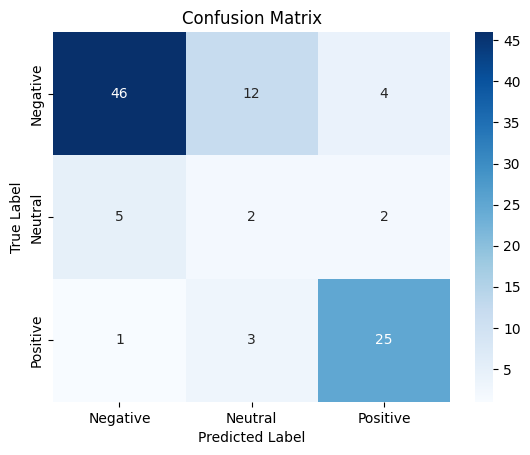

In [56]:
import pandas as pd
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, label_binarize
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.feature_extraction.text import TfidfVectorizer


# Step 1: Preprocessing - TF-IDF Vectorization
tfidf = TfidfVectorizer(ngram_range=(1, 2), max_features=10000, min_df=2, max_df=0.85, stop_words='english')
X_tfidf = tfidf.fit_transform(final_dataset['cleaned_review'])  # Assuming 'cleaned_review' is the text column

# Step 2: Encode the 'Sentiment' column into numeric values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(final_dataset['Sentiment'])  # 'Sentiment' is the target column

# Step 3: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42, stratify=y)

# Step 4: Train the SVM model
model = SVC(probability=True, random_state=42)
model.fit(X_train, y_train)

# Step 5: Make predictions
y_pred = model.predict(X_test)

# Step 6: Calculate Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Binarize the output for ROC-AUC calculation (for multi-class classification)
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])  # Assuming 3 classes: 0=Negative, 1=Neutral, 2=Positive
y_pred_proba = model.predict_proba(X_test)
roc_auc = roc_auc_score(y_test_binarized, y_pred_proba, average='weighted', multi_class='ovr')

# Display the results
print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Precision: {precision * 100:.2f}%')
print(f'Recall: {recall * 100:.2f}%')
print(f'F1 Score: {f1 * 100:.2f}%')
print(f'ROC-AUC: {roc_auc * 100:.2f}%')


# Create a DataFrame for the test data
# Sample review text and sentiment data for model testing
data = {
    'Review_Text': ['provider rude would recommend', 'staff top notch definitely return', 'experience standard nothing exceptional', 'experience exceeded wonderful definitely return', 'environment exceeded caring exceeded expectation', 'visit received poor disappointing', 'service made poor multiple mistake made', 'service mediocre mixed feeling', 'provider felt welcoming happier', 'staff received worst disappointing', 'experience felt dissatisfied disappointing', 'service fine mixed feeling', 'environment exceeded wonderful exceeded expectation', 'environment received welcoming highly recommended', 'provider felt terrible multiple mistake made', 'staff worst disappointing', 'experience felt terrible multiple mistake made', 'provider made neglected coming back', 'service met decent mixed feeling', 'staff best highly recommended', 'staff received slow avoid possible', 'service made rude multiple mistake made', 'staff exceeded welcoming professional', 'staff made worst disappointing', 'staff received bad would recommend', 'staff received neglected avoid possible', 'staff dissatisfied multiple mistake made', 'visit okay neither good bad', 'visit received frustrating avoid possible', 'service felt standard met basic expectation', 'attention best happier', 'provider exceeded fantastic exceeded expectation', 'provider disappointing disappointing', 'experience felt satisfied happier', 'attention great professional', 'experience felt poor disappointing', 'staff felt slow would recommend', 'experience received disappointing coming back', 'service met average neither good bad', 'staff felt wonderful professional', 'provider made dissatisfied avoid possible', 'staff felt disappointing coming back', 'staff received fantastic definitely return', 'service mediocre mixed feeling', 'experience received disappointing disappointing', 'experience felt mediocre nothing exceptional', 'attention received excellent happier', 'attention received fantastic definitely return', 'experience exceeded top notch happier', 'provider disappointing coming back', 'experience made disappointing disappointing', 'experience made frustrating would recommend', 'service okay met basic expectation', 'visit received neglected disappointing', 'experience bad would recommend', 'provider made dissatisfied avoid possible', 'service met mediocre neither good bad', 'provider frustrating avoid possible', 'provider felt best exceeded expectation', 'provider exceeded great exceeded expectation', 'experience felt best professional', 'experience met mixed neither good bad', 'staff felt poor disappointing', 'staff neglected disappointing', 'staff made rude disappointing', 'service terrible coming back', 'experience mixed neither good bad', 'provider received bad multiple mistake made', 'provider received welcoming happier', 'service frustrating would recommend', 'experience felt excellent exceeded expectation', 'service felt poor would recommend', 'service received disappointing would recommend', 'service met decent neither good bad', 'service excellent definitely return', 'staff felt disappointing avoid possible', 'experience fantastic happier', 'attention received satisfied highly recommended', 'experience felt exceptional happier', 'attention received exceptional highly recommended', 'attention received top notch definitely return', 'visit okay ordinary', 'visit received slow would recommend', 'experience felt decent ordinary', 'experience felt ordinary mixed feeling', 'staff received satisfied highly recommended', 'service made poor avoid possible', 'visit felt dissatisfied avoid possible', 'service made poor disappointing', 'service made slow multiple mistake made', 'attention felt exceptional happier', 'service received dissatisfied multiple mistake made', 'provider dissatisfied multiple mistake made', 'provider made rude multiple mistake made', 'provider made frustrating disappointing', 'provider made poor avoid possible', 'provider received terrible disappointing', 'experience received dissatisfied avoid possible', 'experience fine neither good bad', 'provider felt terrible disappointing'],
    'Sentiment': ['Negative', 'Positive', 'Neutral', 'Positive', 'Positive', 'Negative', 'Negative', 'Neutral', 'Positive', 'Negative', 'Negative', 'Positive', 'Positive', 'Positive', 'Negative', 'Negative', 'Negative', 'Negative', 'Neutral', 'Positive', 'Negative', 'Negative', 'Positive', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Neutral', 'Positive', 'Positive', 'Negative', 'Neutral', 'Positive', 'Negative', 'Negative', 'Negative', 'Negative', 'Positive', 'Negative', 'Negative', 'Positive', 'Neutral', 'Negative', 'Neutral', 'Positive', 'Positive', 'Negative', 'Negative', 'Negative', 'Negative', 'Positive', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Positive', 'Positive', 'Positive', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Positive', 'Negative', 'Positive', 'Negative', 'Negative', 'Negative', 'Positive', 'Negative', 'Positive', 'Positive', 'Negative', 'Positive', 'Positive', 'Positive', 'Negative', 'Neutral', 'Neutral', 'Positive', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative']
}

df_test = pd.DataFrame(data)

# Step 10: Use the fitted TF-IDF vectorizer from the training set to transform the test data
X_test_tfidf = tfidf.transform(df_test['Review_Text'])

# Step 11: Calculate Compound Score for the new test data and scale it
#df_test['Compound_Score'] = df_test['Review_Text'].apply(lambda review: analyzer.polarity_scores(review)['compound'])
#compound_score_scaled_test = scaler.transform(df_test[['Compound_Score']])

# Step 12: Combine the TF-IDF test data with the scaled Compound Score
#X_test_combined = hstack([X_test_tfidf, compound_score_scaled_test])

# Step 13: Encode the sentiment labels in the test set
df_test['Sentiment_Encoded'] = label_encoder.transform(df_test['Sentiment'])

# Step 14: Predict the sentiment using the trained RandomForest model
y_pred_test = model.predict(X_test_tfidf)

# Step 15: Evaluate the model on the test data
test_accuracy = accuracy_score(df_test['Sentiment_Encoded'], y_pred_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Print the classification report for the test data
print(classification_report(df_test['Sentiment_Encoded'], y_pred_test, target_names=label_encoder.classes_))

# Step 16: Save the predictions along with the test reviews
df_test['Predicted_Sentiment'] = label_encoder.inverse_transform(y_pred_test)
df_test.to_csv('test_results_with_predictions.csv', index=False)

# Print the predictions
print(df_test[['Review_Text', 'Sentiment', 'Predicted_Sentiment']])

# Step 17: Generate and Plot confusion matrix
cm = confusion_matrix(df_test['Sentiment_Encoded'], y_pred_test)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

Fitting 3 folds for each of 72 candidates, totalling 216 fits
Accuracy after hyperparameter tuning: 96.50%
Test Accuracy: 73.00%
              precision    recall  f1-score   support

    Negative       0.88      0.74      0.81        62
     Neutral       0.12      0.22      0.15         9
    Positive       0.81      0.86      0.83        29

    accuracy                           0.73       100
   macro avg       0.60      0.61      0.60       100
weighted avg       0.79      0.73      0.76       100

                                         Review_Text Sentiment  \
0                      provider rude would recommend  Negative   
1                  staff top notch definitely return  Positive   
2            experience standard nothing exceptional   Neutral   
3    experience exceeded wonderful definitely return  Positive   
4   environment exceeded caring exceeded expectation  Positive   
..                                               ...       ...   
95                 provider 

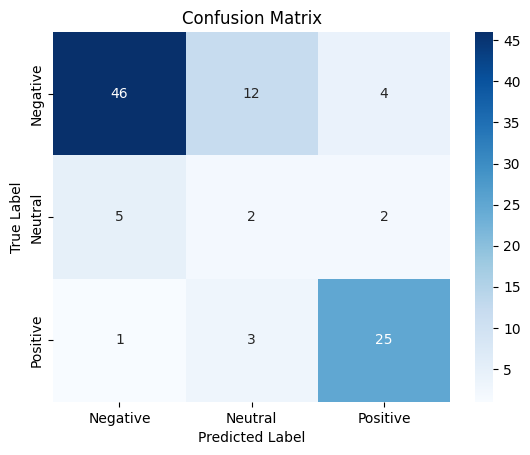

In [57]:
import pandas as pd
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import GridSearchCV

# Assuming you have the dataset 'df_oversampled' and column 'cleaned_review'
# If not, replace 'df_oversampled' and 'cleaned_review' accordingly

# Correct TF-IDF settings
tfidf = TfidfVectorizer(ngram_range=(1, 2), max_features=10000, min_df=2, max_df=0.85, stop_words='english')
X_tfidf = tfidf.fit_transform(final_dataset['cleaned_review'])  # Adjust your dataset name here

# Encode the 'Sentiment' column to numeric values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(final_dataset['Sentiment'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Define the parameter grid for SVM
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4]  # Used only for 'poly' kernel
}

# Initialize GridSearchCV with SVM
grid_search = GridSearchCV(SVC(probability=True, random_state=42), param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the grid search
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions using the best model
y_pred = best_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy after hyperparameter tuning: {accuracy * 100:.2f}%')


# Create a DataFrame for the test data
# Sample review text and sentiment data for model testing
data = {
    'Review_Text': ['provider rude would recommend', 'staff top notch definitely return', 'experience standard nothing exceptional', 'experience exceeded wonderful definitely return', 'environment exceeded caring exceeded expectation', 'visit received poor disappointing', 'service made poor multiple mistake made', 'service mediocre mixed feeling', 'provider felt welcoming happier', 'staff received worst disappointing', 'experience felt dissatisfied disappointing', 'service fine mixed feeling', 'environment exceeded wonderful exceeded expectation', 'environment received welcoming highly recommended', 'provider felt terrible multiple mistake made', 'staff worst disappointing', 'experience felt terrible multiple mistake made', 'provider made neglected coming back', 'service met decent mixed feeling', 'staff best highly recommended', 'staff received slow avoid possible', 'service made rude multiple mistake made', 'staff exceeded welcoming professional', 'staff made worst disappointing', 'staff received bad would recommend', 'staff received neglected avoid possible', 'staff dissatisfied multiple mistake made', 'visit okay neither good bad', 'visit received frustrating avoid possible', 'service felt standard met basic expectation', 'attention best happier', 'provider exceeded fantastic exceeded expectation', 'provider disappointing disappointing', 'experience felt satisfied happier', 'attention great professional', 'experience felt poor disappointing', 'staff felt slow would recommend', 'experience received disappointing coming back', 'service met average neither good bad', 'staff felt wonderful professional', 'provider made dissatisfied avoid possible', 'staff felt disappointing coming back', 'staff received fantastic definitely return', 'service mediocre mixed feeling', 'experience received disappointing disappointing', 'experience felt mediocre nothing exceptional', 'attention received excellent happier', 'attention received fantastic definitely return', 'experience exceeded top notch happier', 'provider disappointing coming back', 'experience made disappointing disappointing', 'experience made frustrating would recommend', 'service okay met basic expectation', 'visit received neglected disappointing', 'experience bad would recommend', 'provider made dissatisfied avoid possible', 'service met mediocre neither good bad', 'provider frustrating avoid possible', 'provider felt best exceeded expectation', 'provider exceeded great exceeded expectation', 'experience felt best professional', 'experience met mixed neither good bad', 'staff felt poor disappointing', 'staff neglected disappointing', 'staff made rude disappointing', 'service terrible coming back', 'experience mixed neither good bad', 'provider received bad multiple mistake made', 'provider received welcoming happier', 'service frustrating would recommend', 'experience felt excellent exceeded expectation', 'service felt poor would recommend', 'service received disappointing would recommend', 'service met decent neither good bad', 'service excellent definitely return', 'staff felt disappointing avoid possible', 'experience fantastic happier', 'attention received satisfied highly recommended', 'experience felt exceptional happier', 'attention received exceptional highly recommended', 'attention received top notch definitely return', 'visit okay ordinary', 'visit received slow would recommend', 'experience felt decent ordinary', 'experience felt ordinary mixed feeling', 'staff received satisfied highly recommended', 'service made poor avoid possible', 'visit felt dissatisfied avoid possible', 'service made poor disappointing', 'service made slow multiple mistake made', 'attention felt exceptional happier', 'service received dissatisfied multiple mistake made', 'provider dissatisfied multiple mistake made', 'provider made rude multiple mistake made', 'provider made frustrating disappointing', 'provider made poor avoid possible', 'provider received terrible disappointing', 'experience received dissatisfied avoid possible', 'experience fine neither good bad', 'provider felt terrible disappointing'],
    'Sentiment': ['Negative', 'Positive', 'Neutral', 'Positive', 'Positive', 'Negative', 'Negative', 'Neutral', 'Positive', 'Negative', 'Negative', 'Positive', 'Positive', 'Positive', 'Negative', 'Negative', 'Negative', 'Negative', 'Neutral', 'Positive', 'Negative', 'Negative', 'Positive', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Neutral', 'Positive', 'Positive', 'Negative', 'Neutral', 'Positive', 'Negative', 'Negative', 'Negative', 'Negative', 'Positive', 'Negative', 'Negative', 'Positive', 'Neutral', 'Negative', 'Neutral', 'Positive', 'Positive', 'Negative', 'Negative', 'Negative', 'Negative', 'Positive', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Positive', 'Positive', 'Positive', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Positive', 'Negative', 'Positive', 'Negative', 'Negative', 'Negative', 'Positive', 'Negative', 'Positive', 'Positive', 'Negative', 'Positive', 'Positive', 'Positive', 'Negative', 'Neutral', 'Neutral', 'Positive', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative']
}

df_test = pd.DataFrame(data)

# Step 10: Use the fitted TF-IDF vectorizer from the training set to transform the test data
X_test_tfidf = tfidf.transform(df_test['Review_Text'])

# Step 11: Calculate Compound Score for the new test data and scale it
#df_test['Compound_Score'] = df_test['Review_Text'].apply(lambda review: analyzer.polarity_scores(review)['compound'])
#compound_score_scaled_test = scaler.transform(df_test[['Compound_Score']])

# Step 12: Combine the TF-IDF test data with the scaled Compound Score
#X_test_combined = hstack([X_test_tfidf, compound_score_scaled_test])

# Step 13: Encode the sentiment labels in the test set
df_test['Sentiment_Encoded'] = label_encoder.transform(df_test['Sentiment'])

# Step 14: Predict the sentiment using the trained RandomForest model
y_pred_test = model.predict(X_test_tfidf)

# Step 15: Evaluate the model on the test data
test_accuracy = accuracy_score(df_test['Sentiment_Encoded'], y_pred_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Print the classification report for the test data
print(classification_report(df_test['Sentiment_Encoded'], y_pred_test, target_names=label_encoder.classes_))

# Step 16: Save the predictions along with the test reviews
df_test['Predicted_Sentiment'] = label_encoder.inverse_transform(y_pred_test)
df_test.to_csv('test_results_with_predictions.csv', index=False)

# Print the predictions
print(df_test[['Review_Text', 'Sentiment', 'Predicted_Sentiment']])

# Step 17: Generate and Plot confusion matrix
cm = confusion_matrix(df_test['Sentiment_Encoded'], y_pred_test)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [89]:
import pandas as pd
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import label_binarize




# Convert text data into features (assuming you have preprocessed text data in 'cleaned_review' column)
tfidf = TfidfVectorizer(ngram_range=(1, 2), max_features=10000, min_df=2, max_df=0.8, stop_words='english')
X_tfidf = tfidf.fit_transform(final_dataset['cleaned_review'])

# Encode the 'Sentiment' column to numeric values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(final_dataset['Sentiment'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import numpy as np

from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
import numpy as np

# Define the parameter space for SVC
param_dist_svc = {
    'C': [0.1, 1, 10, 100],               # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],   # Kernel types
    'gamma': ['scale', 'auto', 0.01, 0.1, 1],  # Kernel coefficient for non-linear kernels
    'degree': [2, 3, 4],                  # Degree of the polynomial kernel (only used for 'poly' kernel)
    'coef0': [0.0, 0.1, 0.5]              # Independent term in polynomial and sigmoid kernels
}

# Initialize RandomizedSearchCV for SVC
random_search_svc = RandomizedSearchCV(estimator=SVC(probability=True, random_state=42),  # `probability=True` for predict_proba()
                                       param_distributions=param_dist_svc,
                                       n_iter=20, cv=5, verbose=2, random_state=42, n_jobs=-1)

# Fit the Randomized Search model
random_search_svc.fit(X_train, y_train)

# Get the best parameters and the best model
best_params_svc = random_search_svc.best_params_
best_model_svc = random_search_svc.best_estimator_

print(f"Best parameters found by Randomized Search for SVC: {best_params_svc}")

# Predict using the best model found by RandomizedSearchCV
y_pred_svc = best_model_svc.predict(X_test)

# Calculate the accuracy on the test set
accuracy_svc = accuracy_score(y_test, y_pred_svc)

# Print the accuracy
print(f'Accuracy after Randomized Search for SVC: {accuracy_svc * 100:.2f}%')


# Create a DataFrame for the test data
# Sample review text and sentiment data for model testing
data = {
    'Review_Text': ['provider rude would recommend', 'staff top notch definitely return', 'experience standard nothing exceptional', 'experience exceeded wonderful definitely return', 'environment exceeded caring exceeded expectation', 'visit received poor disappointing', 'service made poor multiple mistake made', 'service mediocre mixed feeling', 'provider felt welcoming happier', 'staff received worst disappointing', 'experience felt dissatisfied disappointing', 'service fine mixed feeling', 'environment exceeded wonderful exceeded expectation', 'environment received welcoming highly recommended', 'provider felt terrible multiple mistake made', 'staff worst disappointing', 'experience felt terrible multiple mistake made', 'provider made neglected coming back', 'service met decent mixed feeling', 'staff best highly recommended', 'staff received slow avoid possible', 'service made rude multiple mistake made', 'staff exceeded welcoming professional', 'staff made worst disappointing', 'staff received bad would recommend', 'staff received neglected avoid possible', 'staff dissatisfied multiple mistake made', 'visit okay neither good bad', 'visit received frustrating avoid possible', 'service felt standard met basic expectation', 'attention best happier', 'provider exceeded fantastic exceeded expectation', 'provider disappointing disappointing', 'experience felt satisfied happier', 'attention great professional', 'experience felt poor disappointing', 'staff felt slow would recommend', 'experience received disappointing coming back', 'service met average neither good bad', 'staff felt wonderful professional', 'provider made dissatisfied avoid possible', 'staff felt disappointing coming back', 'staff received fantastic definitely return', 'service mediocre mixed feeling', 'experience received disappointing disappointing', 'experience felt mediocre nothing exceptional', 'attention received excellent happier', 'attention received fantastic definitely return', 'experience exceeded top notch happier', 'provider disappointing coming back', 'experience made disappointing disappointing', 'experience made frustrating would recommend', 'service okay met basic expectation', 'visit received neglected disappointing', 'experience bad would recommend', 'provider made dissatisfied avoid possible', 'service met mediocre neither good bad', 'provider frustrating avoid possible', 'provider felt best exceeded expectation', 'provider exceeded great exceeded expectation', 'experience felt best professional', 'experience met mixed neither good bad', 'staff felt poor disappointing', 'staff neglected disappointing', 'staff made rude disappointing', 'service terrible coming back', 'experience mixed neither good bad', 'provider received bad multiple mistake made', 'provider received welcoming happier', 'service frustrating would recommend', 'experience felt excellent exceeded expectation', 'service felt poor would recommend', 'service received disappointing would recommend', 'service met decent neither good bad', 'service excellent definitely return', 'staff felt disappointing avoid possible', 'experience fantastic happier', 'attention received satisfied highly recommended', 'experience felt exceptional happier', 'attention received exceptional highly recommended', 'attention received top notch definitely return', 'visit okay ordinary', 'visit received slow would recommend', 'experience felt decent ordinary', 'experience felt ordinary mixed feeling', 'staff received satisfied highly recommended', 'service made poor avoid possible', 'visit felt dissatisfied avoid possible', 'service made poor disappointing', 'service made slow multiple mistake made', 'attention felt exceptional happier', 'service received dissatisfied multiple mistake made', 'provider dissatisfied multiple mistake made', 'provider made rude multiple mistake made', 'provider made frustrating disappointing', 'provider made poor avoid possible', 'provider received terrible disappointing', 'experience received dissatisfied avoid possible', 'experience fine neither good bad', 'provider felt terrible disappointing'],
    'Sentiment': ['Negative', 'Positive', 'Neutral', 'Positive', 'Positive', 'Negative', 'Negative', 'Neutral', 'Positive', 'Negative', 'Negative', 'Positive', 'Positive', 'Positive', 'Negative', 'Negative', 'Negative', 'Negative', 'Neutral', 'Positive', 'Negative', 'Negative', 'Positive', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Neutral', 'Positive', 'Positive', 'Negative', 'Neutral', 'Positive', 'Negative', 'Negative', 'Negative', 'Negative', 'Positive', 'Negative', 'Negative', 'Positive', 'Neutral', 'Negative', 'Neutral', 'Positive', 'Positive', 'Negative', 'Negative', 'Negative', 'Negative', 'Positive', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Positive', 'Positive', 'Positive', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Positive', 'Negative', 'Positive', 'Negative', 'Negative', 'Negative', 'Positive', 'Negative', 'Positive', 'Positive', 'Negative', 'Positive', 'Positive', 'Positive', 'Negative', 'Neutral', 'Neutral', 'Positive', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative']
}

df_test = pd.DataFrame(data)

# Step 10: Use the fitted TF-IDF vectorizer from the training set to transform the test data
X_test_tfidf = tfidf.transform(df_test['Review_Text'])

# Step 11: Calculate Compound Score for the new test data and scale it
#df_test['Compound_Score'] = df_test['Review_Text'].apply(lambda review: analyzer.polarity_scores(review)['compound'])
#compound_score_scaled_test = scaler.transform(df_test[['Compound_Score']])

# Step 12: Combine the TF-IDF test data with the scaled Compound Score
#X_test_combined = hstack([X_test_tfidf, compound_score_scaled_test])

# Step 13: Encode the sentiment labels in the test set
df_test['Sentiment_Encoded'] = label_encoder.transform(df_test['Sentiment'])

# Step 14: Predict the sentiment using the trained RandomForest model
y_pred_test = model.predict(X_test_tfidf)

# Step 15: Evaluate the model on the test data
test_accuracy = accuracy_score(df_test['Sentiment_Encoded'], y_pred_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Print the classification report for the test data
print(classification_report(df_test['Sentiment_Encoded'], y_pred_test, target_names=label_encoder.classes_))

# Step 16: Save the predictions along with the test reviews
df_test['Predicted_Sentiment'] = label_encoder.inverse_transform(y_pred_test)
df_test.to_csv('test_results_with_predictions.csv', index=False)

# Print the predictions
print(df_test[['Review_Text', 'Sentiment', 'Predicted_Sentiment']])

# Step 17: Generate and Plot confusion matrix
cm = confusion_matrix(df_test['Sentiment_Encoded'], y_pred_test)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters found by Randomized Search for SVC: {'kernel': 'poly', 'gamma': 'scale', 'degree': 4, 'coef0': 0.1, 'C': 0.1}
Accuracy after Randomized Search for SVC: 73.23%


In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.utils import resample

# Convert text data into features (assuming you have preprocessed text data in 'cleaned_review' column)
from sklearn.feature_extraction.text import TfidfVectorizer




tfidf = TfidfVectorizer(ngram_range=(1, 2), max_features=10000, min_df=2, max_df=0.8, stop_words='english')
X_tfidf = tfidf.fit_transform(final_dataset['cleaned_review'])

# Encode the 'Sentiment' column to numeric values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(final_dataset['Sentiment'])

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42, stratify=y)


# Initialize the Logistic Regression classifier
logreg_model = LogisticRegression(max_iter=1000)

# Train the model
logreg_model.fit(X_train, y_train)

# Make predictions
logreg_predictions = logreg_model.predict(X_test)

# Calculate accuracy
logreg_accuracy = accuracy_score(y_test, logreg_predictions)
print(f'Logistic Regression Accuracy: {logreg_accuracy * 100:.2f}%')


# Create a DataFrame for the test data
# Sample review text and sentiment data for model testing
data = {
    'Review_Text': ['provider rude would recommend', 'staff top notch definitely return', 'experience standard nothing exceptional', 'experience exceeded wonderful definitely return', 'environment exceeded caring exceeded expectation', 'visit received poor disappointing', 'service made poor multiple mistake made', 'service mediocre mixed feeling', 'provider felt welcoming happier', 'staff received worst disappointing', 'experience felt dissatisfied disappointing', 'service fine mixed feeling', 'environment exceeded wonderful exceeded expectation', 'environment received welcoming highly recommended', 'provider felt terrible multiple mistake made', 'staff worst disappointing', 'experience felt terrible multiple mistake made', 'provider made neglected coming back', 'service met decent mixed feeling', 'staff best highly recommended', 'staff received slow avoid possible', 'service made rude multiple mistake made', 'staff exceeded welcoming professional', 'staff made worst disappointing', 'staff received bad would recommend', 'staff received neglected avoid possible', 'staff dissatisfied multiple mistake made', 'visit okay neither good bad', 'visit received frustrating avoid possible', 'service felt standard met basic expectation', 'attention best happier', 'provider exceeded fantastic exceeded expectation', 'provider disappointing disappointing', 'experience felt satisfied happier', 'attention great professional', 'experience felt poor disappointing', 'staff felt slow would recommend', 'experience received disappointing coming back', 'service met average neither good bad', 'staff felt wonderful professional', 'provider made dissatisfied avoid possible', 'staff felt disappointing coming back', 'staff received fantastic definitely return', 'service mediocre mixed feeling', 'experience received disappointing disappointing', 'experience felt mediocre nothing exceptional', 'attention received excellent happier', 'attention received fantastic definitely return', 'experience exceeded top notch happier', 'provider disappointing coming back', 'experience made disappointing disappointing', 'experience made frustrating would recommend', 'service okay met basic expectation', 'visit received neglected disappointing', 'experience bad would recommend', 'provider made dissatisfied avoid possible', 'service met mediocre neither good bad', 'provider frustrating avoid possible', 'provider felt best exceeded expectation', 'provider exceeded great exceeded expectation', 'experience felt best professional', 'experience met mixed neither good bad', 'staff felt poor disappointing', 'staff neglected disappointing', 'staff made rude disappointing', 'service terrible coming back', 'experience mixed neither good bad', 'provider received bad multiple mistake made', 'provider received welcoming happier', 'service frustrating would recommend', 'experience felt excellent exceeded expectation', 'service felt poor would recommend', 'service received disappointing would recommend', 'service met decent neither good bad', 'service excellent definitely return', 'staff felt disappointing avoid possible', 'experience fantastic happier', 'attention received satisfied highly recommended', 'experience felt exceptional happier', 'attention received exceptional highly recommended', 'attention received top notch definitely return', 'visit okay ordinary', 'visit received slow would recommend', 'experience felt decent ordinary', 'experience felt ordinary mixed feeling', 'staff received satisfied highly recommended', 'service made poor avoid possible', 'visit felt dissatisfied avoid possible', 'service made poor disappointing', 'service made slow multiple mistake made', 'attention felt exceptional happier', 'service received dissatisfied multiple mistake made', 'provider dissatisfied multiple mistake made', 'provider made rude multiple mistake made', 'provider made frustrating disappointing', 'provider made poor avoid possible', 'provider received terrible disappointing', 'experience received dissatisfied avoid possible', 'experience fine neither good bad', 'provider felt terrible disappointing'],
    'Sentiment': ['Negative', 'Positive', 'Neutral', 'Positive', 'Positive', 'Negative', 'Negative', 'Neutral', 'Positive', 'Negative', 'Negative', 'Positive', 'Positive', 'Positive', 'Negative', 'Negative', 'Negative', 'Negative', 'Neutral', 'Positive', 'Negative', 'Negative', 'Positive', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Neutral', 'Positive', 'Positive', 'Negative', 'Neutral', 'Positive', 'Negative', 'Negative', 'Negative', 'Negative', 'Positive', 'Negative', 'Negative', 'Positive', 'Neutral', 'Negative', 'Neutral', 'Positive', 'Positive', 'Negative', 'Negative', 'Negative', 'Negative', 'Positive', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Positive', 'Positive', 'Positive', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Positive', 'Negative', 'Positive', 'Negative', 'Negative', 'Negative', 'Positive', 'Negative', 'Positive', 'Positive', 'Negative', 'Positive', 'Positive', 'Positive', 'Negative', 'Neutral', 'Neutral', 'Positive', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative']
}

df_test = pd.DataFrame(data)

# Step 10: Use the fitted TF-IDF vectorizer from the training set to transform the test data
X_test_tfidf = tfidf.transform(df_test['Review_Text'])

# Step 11: Calculate Compound Score for the new test data and scale it
#df_test['Compound_Score'] = df_test['Review_Text'].apply(lambda review: analyzer.polarity_scores(review)['compound'])
#compound_score_scaled_test = scaler.transform(df_test[['Compound_Score']])

# Step 12: Combine the TF-IDF test data with the scaled Compound Score
#X_test_combined = hstack([X_test_tfidf, compound_score_scaled_test])

# Step 13: Encode the sentiment labels in the test set
df_test['Sentiment_Encoded'] = label_encoder.transform(df_test['Sentiment'])

# Step 14: Predict the sentiment using the trained RandomForest model
y_pred_test = model.predict(X_test_tfidf)

# Step 15: Evaluate the model on the test data
test_accuracy = accuracy_score(df_test['Sentiment_Encoded'], y_pred_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Print the classification report for the test data
print(classification_report(df_test['Sentiment_Encoded'], y_pred_test, target_names=label_encoder.classes_))

# Step 16: Save the predictions along with the test reviews
df_test['Predicted_Sentiment'] = label_encoder.inverse_transform(y_pred_test)
df_test.to_csv('test_results_with_predictions.csv', index=False)

# Print the predictions
print(df_test[['Review_Text', 'Sentiment', 'Predicted_Sentiment']])

# Step 17: Generate and Plot confusion matrix
cm = confusion_matrix(df_test['Sentiment_Encoded'], y_pred_test)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

Logistic Regression Accuracy: 71.11%


In [102]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer



# Convert text data into features (assuming you have preprocessed text data in 'cleaned_review' column)
tfidf = TfidfVectorizer(ngram_range=(1, 2), max_features=15000, min_df=1, max_df=0.9, stop_words='english')
X_tfidf = tfidf.fit_transform(final_dataset['cleaned_review'])

# Encode the 'Sentiment' column to numeric values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(final_dataset['Sentiment'])



from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import numpy as np

from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
import numpy as np




# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42, stratify=y)

# Step 2: Initialize the XGBoost model
xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=3, random_state=42, use_label_encoder=False)

# Step 3: Train the model
xgb_model.fit(X_train, y_train)

# Step 4: Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Step 5: Evaluate the model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f'XGBoost Accuracy: {accuracy_xgb * 100:.2f}%')

# Print a classification report
print(classification_report(y_test, y_pred_xgb, target_names=label_encoder.classes_))


# Create a DataFrame for the test data
# Sample review text and sentiment data for model testing
data = {
    'Review_Text': ['provider rude would recommend', 'staff top notch definitely return', 'experience standard nothing exceptional', 'experience exceeded wonderful definitely return', 'environment exceeded caring exceeded expectation', 'visit received poor disappointing', 'service made poor multiple mistake made', 'service mediocre mixed feeling', 'provider felt welcoming happier', 'staff received worst disappointing', 'experience felt dissatisfied disappointing', 'service fine mixed feeling', 'environment exceeded wonderful exceeded expectation', 'environment received welcoming highly recommended', 'provider felt terrible multiple mistake made', 'staff worst disappointing', 'experience felt terrible multiple mistake made', 'provider made neglected coming back', 'service met decent mixed feeling', 'staff best highly recommended', 'staff received slow avoid possible', 'service made rude multiple mistake made', 'staff exceeded welcoming professional', 'staff made worst disappointing', 'staff received bad would recommend', 'staff received neglected avoid possible', 'staff dissatisfied multiple mistake made', 'visit okay neither good bad', 'visit received frustrating avoid possible', 'service felt standard met basic expectation', 'attention best happier', 'provider exceeded fantastic exceeded expectation', 'provider disappointing disappointing', 'experience felt satisfied happier', 'attention great professional', 'experience felt poor disappointing', 'staff felt slow would recommend', 'experience received disappointing coming back', 'service met average neither good bad', 'staff felt wonderful professional', 'provider made dissatisfied avoid possible', 'staff felt disappointing coming back', 'staff received fantastic definitely return', 'service mediocre mixed feeling', 'experience received disappointing disappointing', 'experience felt mediocre nothing exceptional', 'attention received excellent happier', 'attention received fantastic definitely return', 'experience exceeded top notch happier', 'provider disappointing coming back', 'experience made disappointing disappointing', 'experience made frustrating would recommend', 'service okay met basic expectation', 'visit received neglected disappointing', 'experience bad would recommend', 'provider made dissatisfied avoid possible', 'service met mediocre neither good bad', 'provider frustrating avoid possible', 'provider felt best exceeded expectation', 'provider exceeded great exceeded expectation', 'experience felt best professional', 'experience met mixed neither good bad', 'staff felt poor disappointing', 'staff neglected disappointing', 'staff made rude disappointing', 'service terrible coming back', 'experience mixed neither good bad', 'provider received bad multiple mistake made', 'provider received welcoming happier', 'service frustrating would recommend', 'experience felt excellent exceeded expectation', 'service felt poor would recommend', 'service received disappointing would recommend', 'service met decent neither good bad', 'service excellent definitely return', 'staff felt disappointing avoid possible', 'experience fantastic happier', 'attention received satisfied highly recommended', 'experience felt exceptional happier', 'attention received exceptional highly recommended', 'attention received top notch definitely return', 'visit okay ordinary', 'visit received slow would recommend', 'experience felt decent ordinary', 'experience felt ordinary mixed feeling', 'staff received satisfied highly recommended', 'service made poor avoid possible', 'visit felt dissatisfied avoid possible', 'service made poor disappointing', 'service made slow multiple mistake made', 'attention felt exceptional happier', 'service received dissatisfied multiple mistake made', 'provider dissatisfied multiple mistake made', 'provider made rude multiple mistake made', 'provider made frustrating disappointing', 'provider made poor avoid possible', 'provider received terrible disappointing', 'experience received dissatisfied avoid possible', 'experience fine neither good bad', 'provider felt terrible disappointing'],
    'Sentiment': ['Negative', 'Positive', 'Neutral', 'Positive', 'Positive', 'Negative', 'Negative', 'Neutral', 'Positive', 'Negative', 'Negative', 'Positive', 'Positive', 'Positive', 'Negative', 'Negative', 'Negative', 'Negative', 'Neutral', 'Positive', 'Negative', 'Negative', 'Positive', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Neutral', 'Positive', 'Positive', 'Negative', 'Neutral', 'Positive', 'Negative', 'Negative', 'Negative', 'Negative', 'Positive', 'Negative', 'Negative', 'Positive', 'Neutral', 'Negative', 'Neutral', 'Positive', 'Positive', 'Negative', 'Negative', 'Negative', 'Negative', 'Positive', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Positive', 'Positive', 'Positive', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Positive', 'Negative', 'Positive', 'Negative', 'Negative', 'Negative', 'Positive', 'Negative', 'Positive', 'Positive', 'Negative', 'Positive', 'Positive', 'Positive', 'Negative', 'Neutral', 'Neutral', 'Positive', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative']
}

df_test = pd.DataFrame(data)

# Step 10: Use the fitted TF-IDF vectorizer from the training set to transform the test data
X_test_tfidf = tfidf.transform(df_test['Review_Text'])

# Step 11: Calculate Compound Score for the new test data and scale it
#df_test['Compound_Score'] = df_test['Review_Text'].apply(lambda review: analyzer.polarity_scores(review)['compound'])
#compound_score_scaled_test = scaler.transform(df_test[['Compound_Score']])

# Step 12: Combine the TF-IDF test data with the scaled Compound Score
#X_test_combined = hstack([X_test_tfidf, compound_score_scaled_test])

# Step 13: Encode the sentiment labels in the test set
df_test['Sentiment_Encoded'] = label_encoder.transform(df_test['Sentiment'])

# Step 14: Predict the sentiment using the trained RandomForest model
y_pred_test = model.predict(X_test_tfidf)

# Step 15: Evaluate the model on the test data
test_accuracy = accuracy_score(df_test['Sentiment_Encoded'], y_pred_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Print the classification report for the test data
print(classification_report(df_test['Sentiment_Encoded'], y_pred_test, target_names=label_encoder.classes_))

# Step 16: Save the predictions along with the test reviews
df_test['Predicted_Sentiment'] = label_encoder.inverse_transform(y_pred_test)
df_test.to_csv('test_results_with_predictions.csv', index=False)

# Print the predictions
print(df_test[['Review_Text', 'Sentiment', 'Predicted_Sentiment']])

# Step 17: Generate and Plot confusion matrix
cm = confusion_matrix(df_test['Sentiment_Encoded'], y_pred_test)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [20:53:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 68.29%
              precision    recall  f1-score   support

    Negative       0.71      0.89      0.79       530
     Neutral       0.24      0.08      0.12       344
    Positive       0.75      0.93      0.83       400

    accuracy                           0.68      1274
   macro avg       0.57      0.63      0.58      1274
weighted avg       0.59      0.68      0.62      1274



In [111]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import numpy as np

# Convert text data into features
tfidf = TfidfVectorizer(ngram_range=(1, 2), max_features=10000, min_df=1, max_df=0.9, stop_words='english')
X_tfidf = tfidf.fit_transform(final_dataset['cleaned_review'])

from sklearn.decomposition import TruncatedSVD

# Apply TruncatedSVD to reduce dimensions, retaining 95% of the variance
svd = TruncatedSVD(n_components=300)  # Set the number of components manually
X_tfidf_reduced = svd.fit_transform(X_tfidf)

# Proceed with train-test split and modeling using X_tfidf_reduced


# Encode the 'Sentiment' column to numeric values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(final_dataset['Sentiment'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf_reduced, y, test_size=0.2, random_state=42, stratify=y)

# Initialize the XGBoost model
xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=3, random_state=42, use_label_encoder=False)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f'XGBoost Accuracy: {accuracy_xgb * 100:.2f}%')

# Print a classification report
print(classification_report(y_test, y_pred_xgb, target_names=label_encoder.classes_))

# Define the parameter grid for Randomized Search
param_dist = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2],
    'reg_alpha': [0, 0.01, 0.1],
    'reg_lambda': [1, 1.5, 2.0],
    'scale_pos_weight': [1, 2, 3]  # Only relevant if the dataset is imbalanced
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(xgb_model, param_distributions=param_dist, n_iter=20, cv=5, verbose=2, random_state=42, n_jobs=-1)

# Fit the Randomized Search model
random_search.fit(X_train, y_train)

# Get the best parameters and the best model
best_params = random_search.best_params_
best_model = random_search.best_estimator_

print(f"Best parameters found by Randomized Search: {best_params}")

# Make predictions using the best model
y_pred_best = best_model.predict(X_test)

# Evaluate the best model
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f'XGBoost Accuracy after Randomized Search: {accuracy_best * 100:.2f}%')


# Create a DataFrame for the test data
# Sample review text and sentiment data for model testing
data = {
    'Review_Text': ['provider rude would recommend', 'staff top notch definitely return', 'experience standard nothing exceptional', 'experience exceeded wonderful definitely return', 'environment exceeded caring exceeded expectation', 'visit received poor disappointing', 'service made poor multiple mistake made', 'service mediocre mixed feeling', 'provider felt welcoming happier', 'staff received worst disappointing', 'experience felt dissatisfied disappointing', 'service fine mixed feeling', 'environment exceeded wonderful exceeded expectation', 'environment received welcoming highly recommended', 'provider felt terrible multiple mistake made', 'staff worst disappointing', 'experience felt terrible multiple mistake made', 'provider made neglected coming back', 'service met decent mixed feeling', 'staff best highly recommended', 'staff received slow avoid possible', 'service made rude multiple mistake made', 'staff exceeded welcoming professional', 'staff made worst disappointing', 'staff received bad would recommend', 'staff received neglected avoid possible', 'staff dissatisfied multiple mistake made', 'visit okay neither good bad', 'visit received frustrating avoid possible', 'service felt standard met basic expectation', 'attention best happier', 'provider exceeded fantastic exceeded expectation', 'provider disappointing disappointing', 'experience felt satisfied happier', 'attention great professional', 'experience felt poor disappointing', 'staff felt slow would recommend', 'experience received disappointing coming back', 'service met average neither good bad', 'staff felt wonderful professional', 'provider made dissatisfied avoid possible', 'staff felt disappointing coming back', 'staff received fantastic definitely return', 'service mediocre mixed feeling', 'experience received disappointing disappointing', 'experience felt mediocre nothing exceptional', 'attention received excellent happier', 'attention received fantastic definitely return', 'experience exceeded top notch happier', 'provider disappointing coming back', 'experience made disappointing disappointing', 'experience made frustrating would recommend', 'service okay met basic expectation', 'visit received neglected disappointing', 'experience bad would recommend', 'provider made dissatisfied avoid possible', 'service met mediocre neither good bad', 'provider frustrating avoid possible', 'provider felt best exceeded expectation', 'provider exceeded great exceeded expectation', 'experience felt best professional', 'experience met mixed neither good bad', 'staff felt poor disappointing', 'staff neglected disappointing', 'staff made rude disappointing', 'service terrible coming back', 'experience mixed neither good bad', 'provider received bad multiple mistake made', 'provider received welcoming happier', 'service frustrating would recommend', 'experience felt excellent exceeded expectation', 'service felt poor would recommend', 'service received disappointing would recommend', 'service met decent neither good bad', 'service excellent definitely return', 'staff felt disappointing avoid possible', 'experience fantastic happier', 'attention received satisfied highly recommended', 'experience felt exceptional happier', 'attention received exceptional highly recommended', 'attention received top notch definitely return', 'visit okay ordinary', 'visit received slow would recommend', 'experience felt decent ordinary', 'experience felt ordinary mixed feeling', 'staff received satisfied highly recommended', 'service made poor avoid possible', 'visit felt dissatisfied avoid possible', 'service made poor disappointing', 'service made slow multiple mistake made', 'attention felt exceptional happier', 'service received dissatisfied multiple mistake made', 'provider dissatisfied multiple mistake made', 'provider made rude multiple mistake made', 'provider made frustrating disappointing', 'provider made poor avoid possible', 'provider received terrible disappointing', 'experience received dissatisfied avoid possible', 'experience fine neither good bad', 'provider felt terrible disappointing'],
    'Sentiment': ['Negative', 'Positive', 'Neutral', 'Positive', 'Positive', 'Negative', 'Negative', 'Neutral', 'Positive', 'Negative', 'Negative', 'Positive', 'Positive', 'Positive', 'Negative', 'Negative', 'Negative', 'Negative', 'Neutral', 'Positive', 'Negative', 'Negative', 'Positive', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Neutral', 'Positive', 'Positive', 'Negative', 'Neutral', 'Positive', 'Negative', 'Negative', 'Negative', 'Negative', 'Positive', 'Negative', 'Negative', 'Positive', 'Neutral', 'Negative', 'Neutral', 'Positive', 'Positive', 'Negative', 'Negative', 'Negative', 'Negative', 'Positive', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Positive', 'Positive', 'Positive', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Positive', 'Negative', 'Positive', 'Negative', 'Negative', 'Negative', 'Positive', 'Negative', 'Positive', 'Positive', 'Negative', 'Positive', 'Positive', 'Positive', 'Negative', 'Neutral', 'Neutral', 'Positive', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative']
}

df_test = pd.DataFrame(data)

# Step 10: Use the fitted TF-IDF vectorizer from the training set to transform the test data
X_test_tfidf = tfidf.transform(df_test['Review_Text'])

# Step 11: Calculate Compound Score for the new test data and scale it
#df_test['Compound_Score'] = df_test['Review_Text'].apply(lambda review: analyzer.polarity_scores(review)['compound'])
#compound_score_scaled_test = scaler.transform(df_test[['Compound_Score']])

# Step 12: Combine the TF-IDF test data with the scaled Compound Score
#X_test_combined = hstack([X_test_tfidf, compound_score_scaled_test])

# Step 13: Encode the sentiment labels in the test set
df_test['Sentiment_Encoded'] = label_encoder.transform(df_test['Sentiment'])

# Step 14: Predict the sentiment using the trained RandomForest model
y_pred_test = model.predict(X_test_tfidf)

# Step 15: Evaluate the model on the test data
test_accuracy = accuracy_score(df_test['Sentiment_Encoded'], y_pred_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Print the classification report for the test data
print(classification_report(df_test['Sentiment_Encoded'], y_pred_test, target_names=label_encoder.classes_))

# Step 16: Save the predictions along with the test reviews
df_test['Predicted_Sentiment'] = label_encoder.inverse_transform(y_pred_test)
df_test.to_csv('test_results_with_predictions.csv', index=False)

# Print the predictions
print(df_test[['Review_Text', 'Sentiment', 'Predicted_Sentiment']])

# Step 17: Generate and Plot confusion matrix
cm = confusion_matrix(df_test['Sentiment_Encoded'], y_pred_test)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [21:13:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 65.07%
              precision    recall  f1-score   support

    Negative       0.72      0.82      0.76       530
     Neutral       0.25      0.14      0.18       344
    Positive       0.74      0.87      0.80       400

    accuracy                           0.65      1274
   macro avg       0.57      0.61      0.58      1274
weighted avg       0.60      0.65      0.62      1274

Fitting 5 folds for each of 20 candidates, totalling 100 fits


C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [21:28:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best parameters found by Randomized Search: {'subsample': 0.8, 'scale_pos_weight': 2, 'reg_lambda': 1.5, 'reg_alpha': 0.01, 'n_estimators': 100, 'min_child_weight': 1, 'max_depth': 5, 'learning_rate': 0.01, 'gamma': 0, 'colsample_bytree': 0.6}
XGBoost Accuracy after Randomized Search: 71.74%


In [64]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],            # Number of trees
    'learning_rate': [0.01, 0.1, 0.3],          # Learning rate (step size)
    'max_depth': [3, 5, 7],                     # Maximum depth of trees
    'min_child_weight': [1, 3, 5],              # Minimum sum of weights in a child node
    'subsample': [0.6, 0.8, 1.0],               # Fraction of samples for each tree
    'colsample_bytree': [0.6, 0.8, 1.0]         # Fraction of features for each tree
}

# Step 2: Initialize the XGBoost classifier
xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=3, random_state=42, use_label_encoder=False)

# Step 3: Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model,
                           param_grid=param_grid,
                           scoring='accuracy',  # Evaluation metric
                           n_jobs=-1,           # Use all available cores
                           cv=5,                # 5-fold cross-validation
                           verbose=2)

# Step 4: Fit the Grid Search model
grid_search.fit(X_train, y_train)

# Step 5: Get the best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(f"Best parameters found by GridSearchCV: {best_params}")

# Step 6: Make predictions using the best model
y_pred_best = best_model.predict(X_test)

# Step 7: Evaluate the model
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f'XGBoost Accuracy after Grid Search: {accuracy_best * 100:.2f}%')

# Print a classification report
print(classification_report(y_test, y_pred_best, target_names=label_encoder.classes_))


# Create a DataFrame for the test data
# Sample review text and sentiment data for model testing
data = {
    'Review_Text': ['provider rude would recommend', 'staff top notch definitely return', 'experience standard nothing exceptional', 'experience exceeded wonderful definitely return', 'environment exceeded caring exceeded expectation', 'visit received poor disappointing', 'service made poor multiple mistake made', 'service mediocre mixed feeling', 'provider felt welcoming happier', 'staff received worst disappointing', 'experience felt dissatisfied disappointing', 'service fine mixed feeling', 'environment exceeded wonderful exceeded expectation', 'environment received welcoming highly recommended', 'provider felt terrible multiple mistake made', 'staff worst disappointing', 'experience felt terrible multiple mistake made', 'provider made neglected coming back', 'service met decent mixed feeling', 'staff best highly recommended', 'staff received slow avoid possible', 'service made rude multiple mistake made', 'staff exceeded welcoming professional', 'staff made worst disappointing', 'staff received bad would recommend', 'staff received neglected avoid possible', 'staff dissatisfied multiple mistake made', 'visit okay neither good bad', 'visit received frustrating avoid possible', 'service felt standard met basic expectation', 'attention best happier', 'provider exceeded fantastic exceeded expectation', 'provider disappointing disappointing', 'experience felt satisfied happier', 'attention great professional', 'experience felt poor disappointing', 'staff felt slow would recommend', 'experience received disappointing coming back', 'service met average neither good bad', 'staff felt wonderful professional', 'provider made dissatisfied avoid possible', 'staff felt disappointing coming back', 'staff received fantastic definitely return', 'service mediocre mixed feeling', 'experience received disappointing disappointing', 'experience felt mediocre nothing exceptional', 'attention received excellent happier', 'attention received fantastic definitely return', 'experience exceeded top notch happier', 'provider disappointing coming back', 'experience made disappointing disappointing', 'experience made frustrating would recommend', 'service okay met basic expectation', 'visit received neglected disappointing', 'experience bad would recommend', 'provider made dissatisfied avoid possible', 'service met mediocre neither good bad', 'provider frustrating avoid possible', 'provider felt best exceeded expectation', 'provider exceeded great exceeded expectation', 'experience felt best professional', 'experience met mixed neither good bad', 'staff felt poor disappointing', 'staff neglected disappointing', 'staff made rude disappointing', 'service terrible coming back', 'experience mixed neither good bad', 'provider received bad multiple mistake made', 'provider received welcoming happier', 'service frustrating would recommend', 'experience felt excellent exceeded expectation', 'service felt poor would recommend', 'service received disappointing would recommend', 'service met decent neither good bad', 'service excellent definitely return', 'staff felt disappointing avoid possible', 'experience fantastic happier', 'attention received satisfied highly recommended', 'experience felt exceptional happier', 'attention received exceptional highly recommended', 'attention received top notch definitely return', 'visit okay ordinary', 'visit received slow would recommend', 'experience felt decent ordinary', 'experience felt ordinary mixed feeling', 'staff received satisfied highly recommended', 'service made poor avoid possible', 'visit felt dissatisfied avoid possible', 'service made poor disappointing', 'service made slow multiple mistake made', 'attention felt exceptional happier', 'service received dissatisfied multiple mistake made', 'provider dissatisfied multiple mistake made', 'provider made rude multiple mistake made', 'provider made frustrating disappointing', 'provider made poor avoid possible', 'provider received terrible disappointing', 'experience received dissatisfied avoid possible', 'experience fine neither good bad', 'provider felt terrible disappointing'],
    'Sentiment': ['Negative', 'Positive', 'Neutral', 'Positive', 'Positive', 'Negative', 'Negative', 'Neutral', 'Positive', 'Negative', 'Negative', 'Positive', 'Positive', 'Positive', 'Negative', 'Negative', 'Negative', 'Negative', 'Neutral', 'Positive', 'Negative', 'Negative', 'Positive', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Neutral', 'Positive', 'Positive', 'Negative', 'Neutral', 'Positive', 'Negative', 'Negative', 'Negative', 'Negative', 'Positive', 'Negative', 'Negative', 'Positive', 'Neutral', 'Negative', 'Neutral', 'Positive', 'Positive', 'Negative', 'Negative', 'Negative', 'Negative', 'Positive', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Positive', 'Positive', 'Positive', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Positive', 'Negative', 'Positive', 'Negative', 'Negative', 'Negative', 'Positive', 'Negative', 'Positive', 'Positive', 'Negative', 'Positive', 'Positive', 'Positive', 'Negative', 'Neutral', 'Neutral', 'Positive', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative']
}

df_test = pd.DataFrame(data)

# Step 10: Use the fitted TF-IDF vectorizer from the training set to transform the test data
X_test_tfidf = tfidf.transform(df_test['Review_Text'])

# Step 11: Calculate Compound Score for the new test data and scale it
#df_test['Compound_Score'] = df_test['Review_Text'].apply(lambda review: analyzer.polarity_scores(review)['compound'])
#compound_score_scaled_test = scaler.transform(df_test[['Compound_Score']])

# Step 12: Combine the TF-IDF test data with the scaled Compound Score
#X_test_combined = hstack([X_test_tfidf, compound_score_scaled_test])

# Step 13: Encode the sentiment labels in the test set
df_test['Sentiment_Encoded'] = label_encoder.transform(df_test['Sentiment'])

# Step 14: Predict the sentiment using the trained RandomForest model
y_pred_test = model.predict(X_test_tfidf)

# Step 15: Evaluate the model on the test data
test_accuracy = accuracy_score(df_test['Sentiment_Encoded'], y_pred_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Print the classification report for the test data
print(classification_report(df_test['Sentiment_Encoded'], y_pred_test, target_names=label_encoder.classes_))

# Step 16: Save the predictions along with the test reviews
df_test['Predicted_Sentiment'] = label_encoder.inverse_transform(y_pred_test)
df_test.to_csv('test_results_with_predictions.csv', index=False)

# Print the predictions
print(df_test[['Review_Text', 'Sentiment', 'Predicted_Sentiment']])

# Step 17: Generate and Plot confusion matrix
cm = confusion_matrix(df_test['Sentiment_Encoded'], y_pred_test)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

Fitting 5 folds for each of 729 candidates, totalling 3645 fits


C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [18:01:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best parameters found by GridSearchCV: {'colsample_bytree': 1.0, 'learning_rate': 0.3, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 300, 'subsample': 1.0}
XGBoost Accuracy after Grid Search: 71.05%
              precision    recall  f1-score   support

    Negative       0.73      0.77      0.75       529
     Neutral       0.58      0.46      0.51       530
    Positive       0.78      0.90      0.84       530

    accuracy                           0.71      1589
   macro avg       0.70      0.71      0.70      1589
weighted avg       0.70      0.71      0.70      1589

